In [7]:
import os;
import pickle; 
if os.path.isfile('/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves_HCT116.pickle'):
    StandardCurve_File = open('/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves_HCT116.pickle','rb');
    All_Dicts = pickle.load(StandardCurve_File);
    Num_to_Curve_Dict = All_Dicts[0];
    Num_to_Name_Dict = All_Dicts[1]; 
else: 
    Num_to_Curve_Dict = dict();
    Num_to_Name_Dict = dict();

In [8]:
Pickle_Path = '/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/HCT116';
#File_Path = Pickle_Path+'20200619 A-549 P2 IV_V Pathogen #09-11.pickle';
print(os.listdir(Pickle_Path))
PSD = dict(); 
PSD['201029_142943'] = [1,2,3]; 
PSD['201029_143721'] = [4,5,6]; 
PSD['201029_144427'] = [7,8,9]; 
PSD['201029_145205'] = [10,14,15]; 
PSD['201105_150523'] = [16,17,18]; 
PSD['201105_151230'] = [19,20,21]; 

PSD['201105_151936'] = [22,23,30]; 
PSD['201106_161233'] = [11,12,13];  # this might be 11,12,13  
PSD['201106_155719'] = [24,25,26]; 
PSD['201106_160458'] = [27,28,29]; 


#File_Path = Pickle_Path+'20200703 A-549 P1 IV_V Pathogen #18-20.pickle';

['201029_142943_Plate 1_HCT116.pickle', '201029_143721_Plate 1_HCT116.pickle', '201029_144427_Plate 1_HCT116.pickle', '201029_145205_Plate 1_HCT116.pickle', '201105_150523_Plate 1_HCT116.pickle', '201105_151230_Plate 1_HCT116.pickle', '201105_151936_Plate 1_HCT116.pickle', '201106_155719_Plate 1_HCT116.pickle', '201106_160458_Plate 1_HCT116.pickle', '201106_161233_Plate 1_HCT116.pickle', '210112_170449_Plate 1_HCT116.pickle', '210112_171358_Plate 1_HCT116.pickle', '210112_172306_Plate 1_HCT116.pickle', '210112_173213_Plate 1_HCT116.pickle']


In [9]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import itertools



In [10]:
kernel_names = ['hHCT116','uhHCT116','bp'];
list_of_colors = ['g','r','b']

In [6]:
for filename in os.listdir(Pickle_Path):
    if '_HCT116.pickle' in filename: 
        output_file = open(Pickle_Path+'/'+filename,'rb'); 
        feature_dict = pickle.load(output_file);
        #print(feature_dict)
        all_row_ind = ['A','B','C','D','E','F','G','H']
        all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12']

        plt.figure(figsize=(24,16))
        for row_ind in range(0,len(all_row_ind)):
            for col_ind in range(0,len(all_col_ind)):
                this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
                time_keys = list(feature_dict[this_well].keys());
                time_keys.sort()
                for kernel_ind in [0,2]:
                    kernel =  kernel_names[kernel_ind];
                    if kernel_ind==2:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = [np.max([elem-ys[0],0])/(np.max(ys)-ys[0]) for elem in ys]
                    if kernel_ind==0:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                    if kernel_ind ==1:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                        ys = [np.max([elem-ys[0],0]) for elem in ys]
                    times = [np.float(np.int(elem)*30.0/60.0) for elem in time_keys]
                    subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white',)
                    
                    ys = savgol_filter(ys, 7, 5) # window size 51, polynomial order 3
                    subax.plot(times,ys,'.--',ms=8,color=list_of_colors[kernel_ind])
                    #subax.xlabel('Time (Hrs)',size=20)
                    #subax.ylabel('# of Clusters Estim.',size=20)
                    #ax = plt.gca()
                    #plt.ylim([0,1.0])
                    #subax.set_yscale('log')
                subax.spines['right'].set_visible(False)
                subax.spines['top'].set_visible(False)   
                #if not (row_ind ==7):
                #subax.get_xaxis().set_ticks([repr(np.int(elem)*30.0/60.0) for elem in time_keys])
                if not (col_ind ==0):
                    subax.get_yaxis().set_ticks([])
                if row_ind==0 and col_ind==11:
                    plt.legend(['Healthy HCT116','Bacterial Patch'],fontsize=10,frameon=False)
        #        subax.set_facecolor('gray')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11c32c820> (for post_execute):


KeyboardInterrupt: 

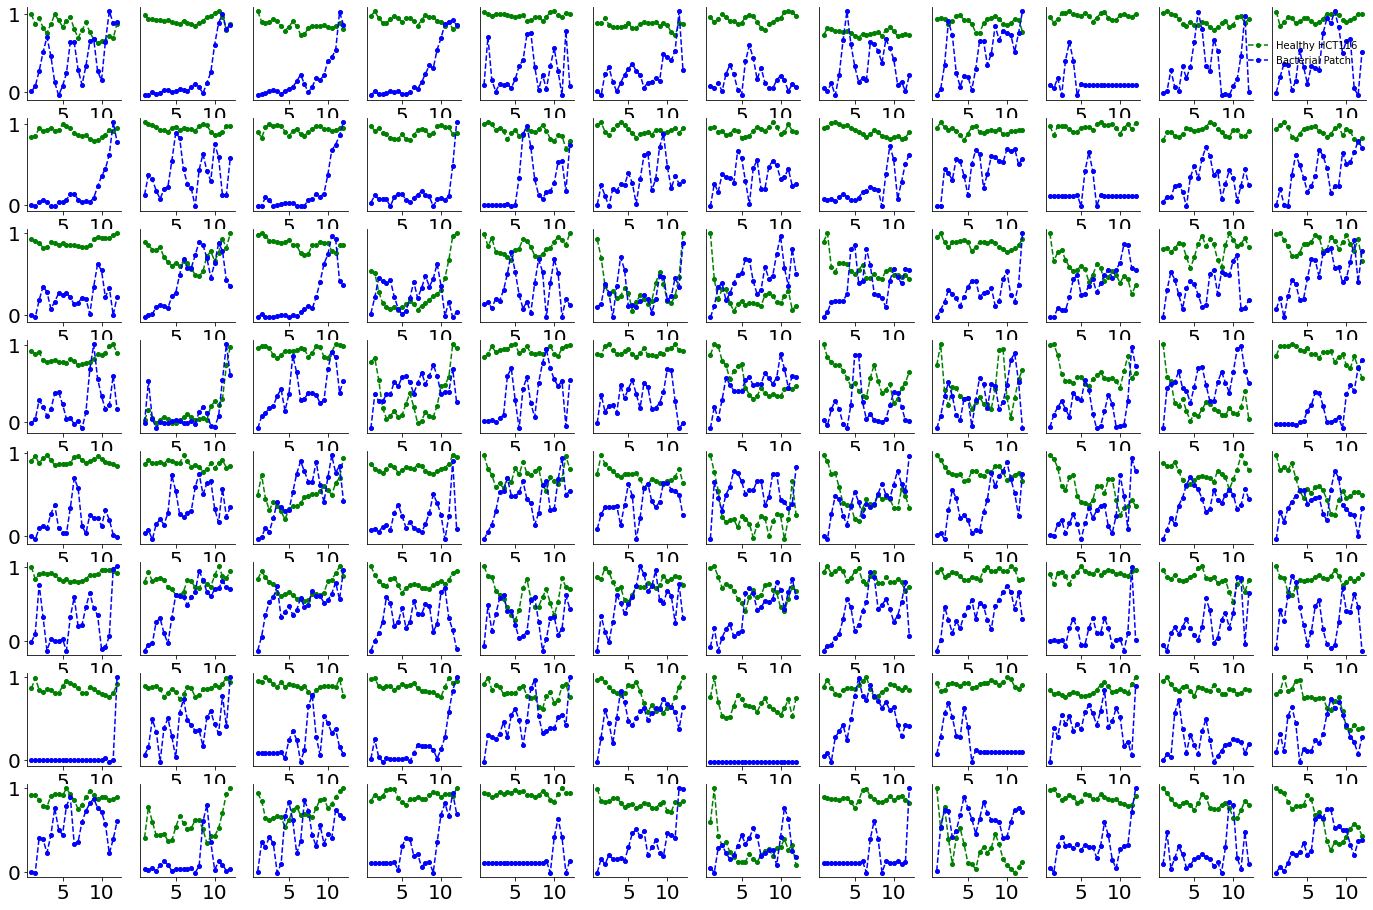

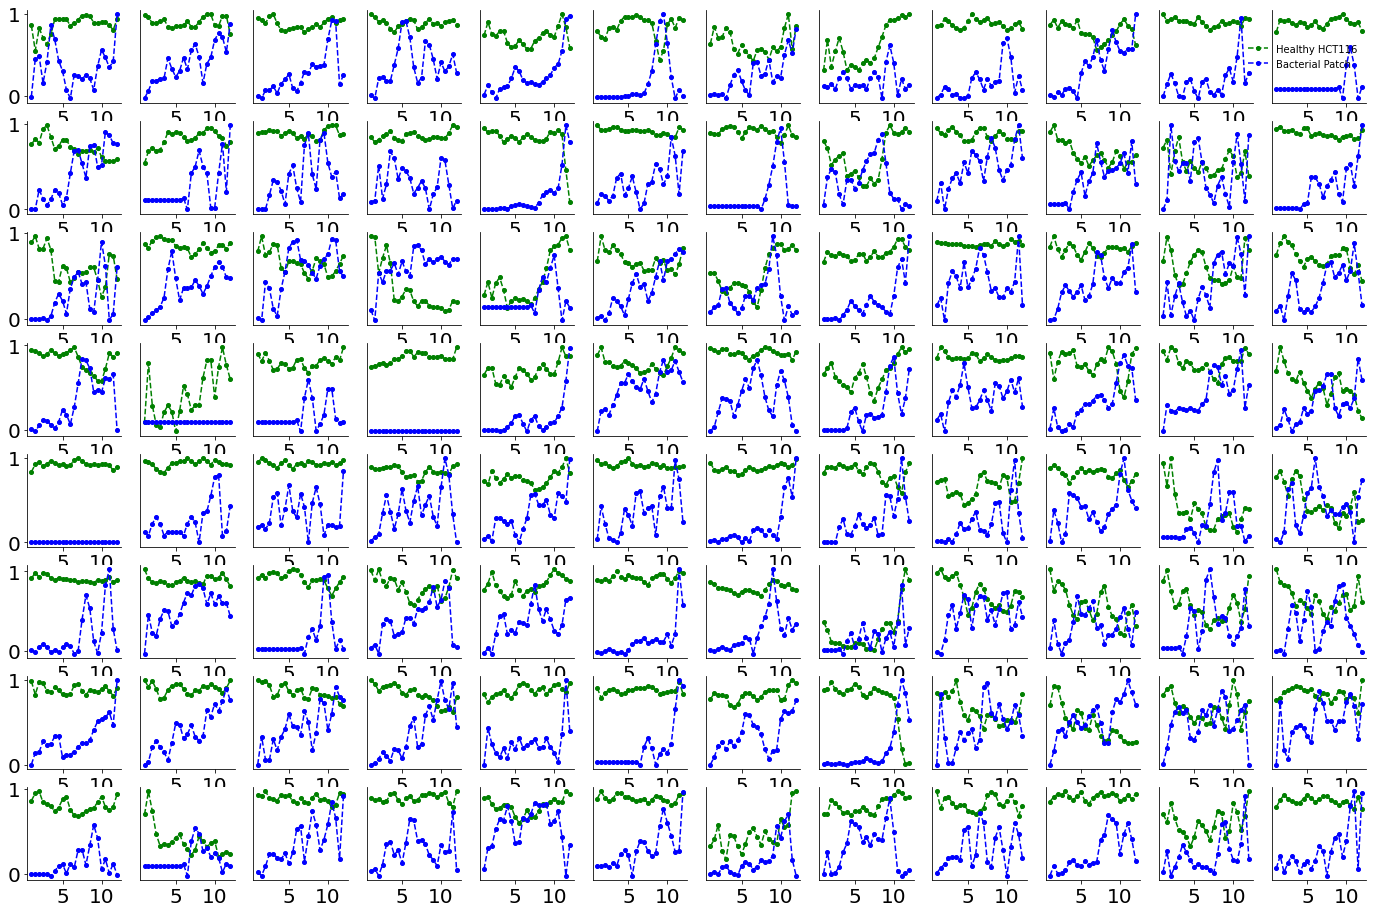

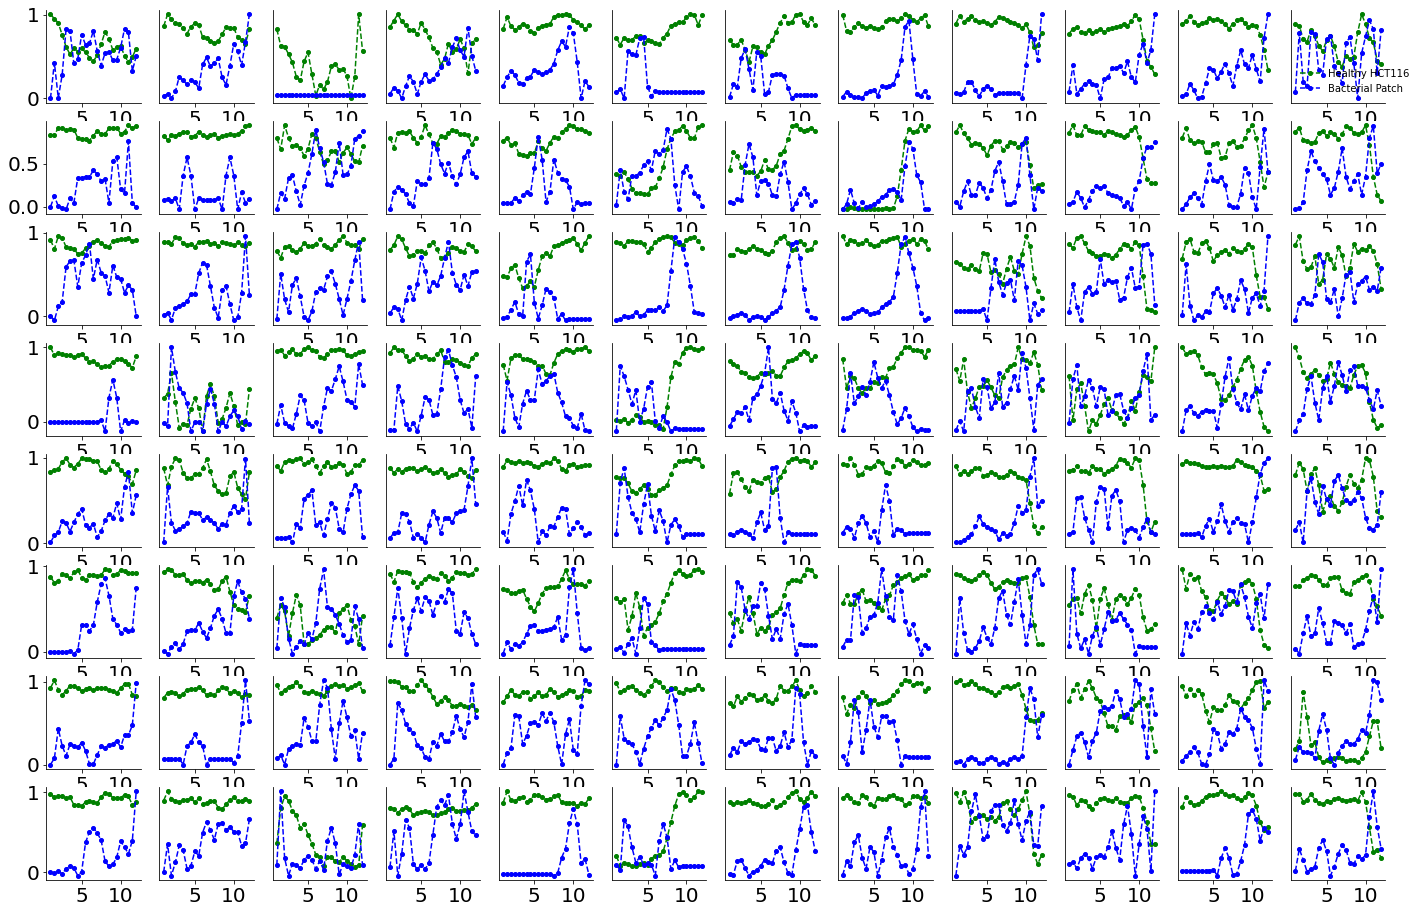

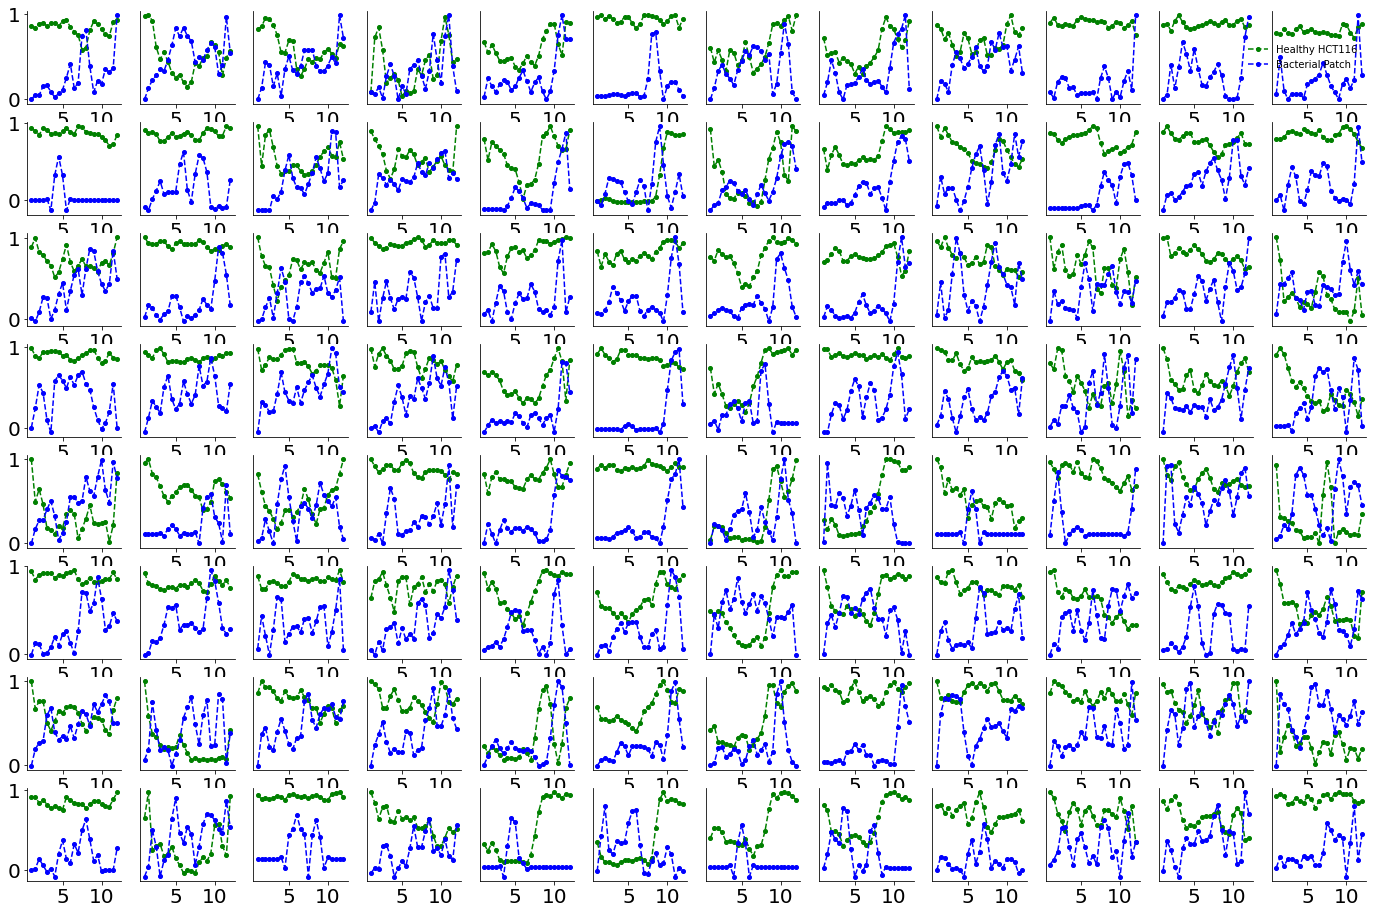

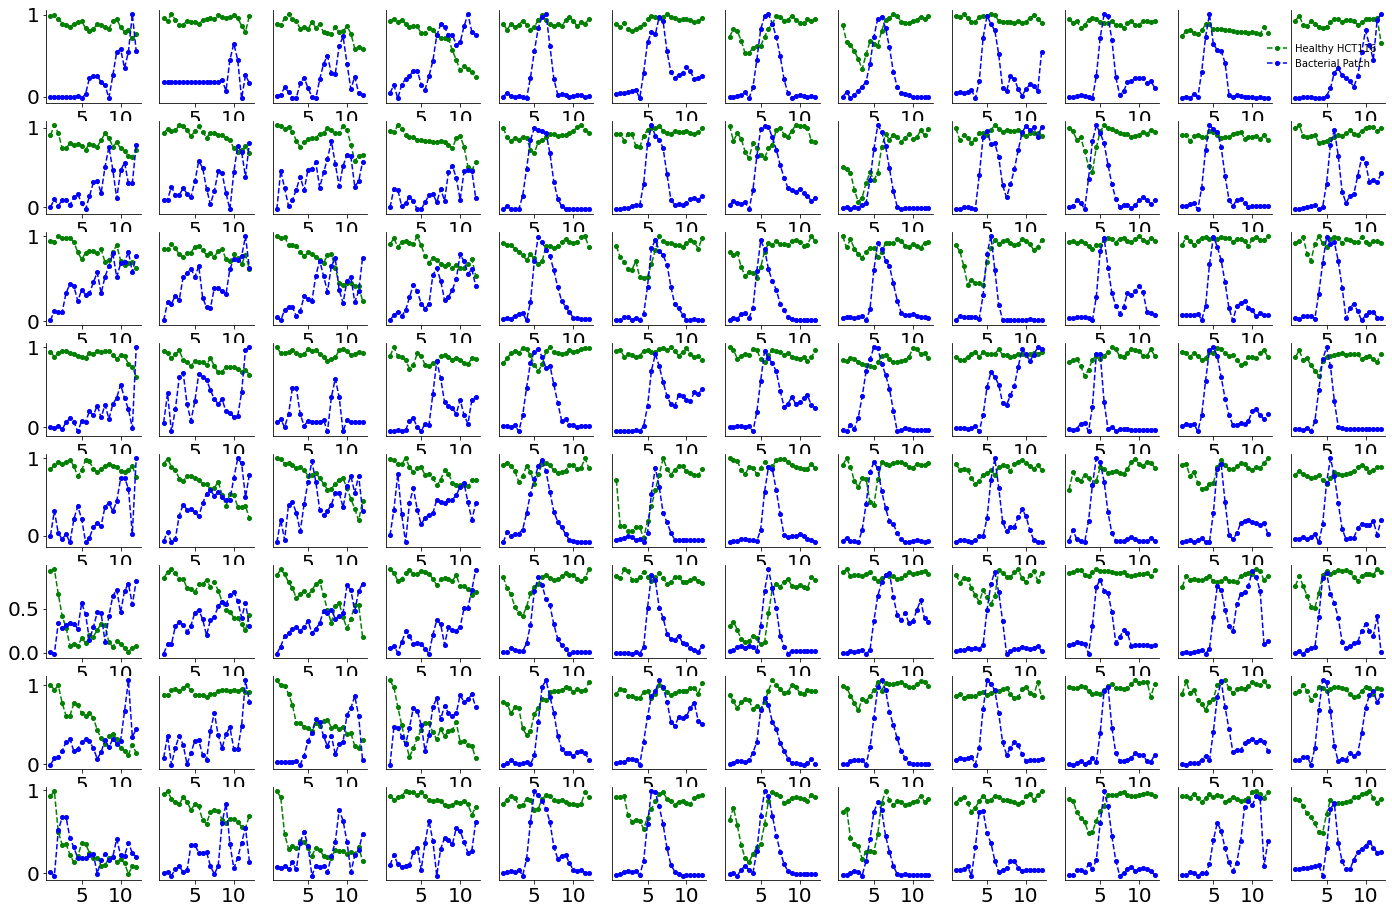

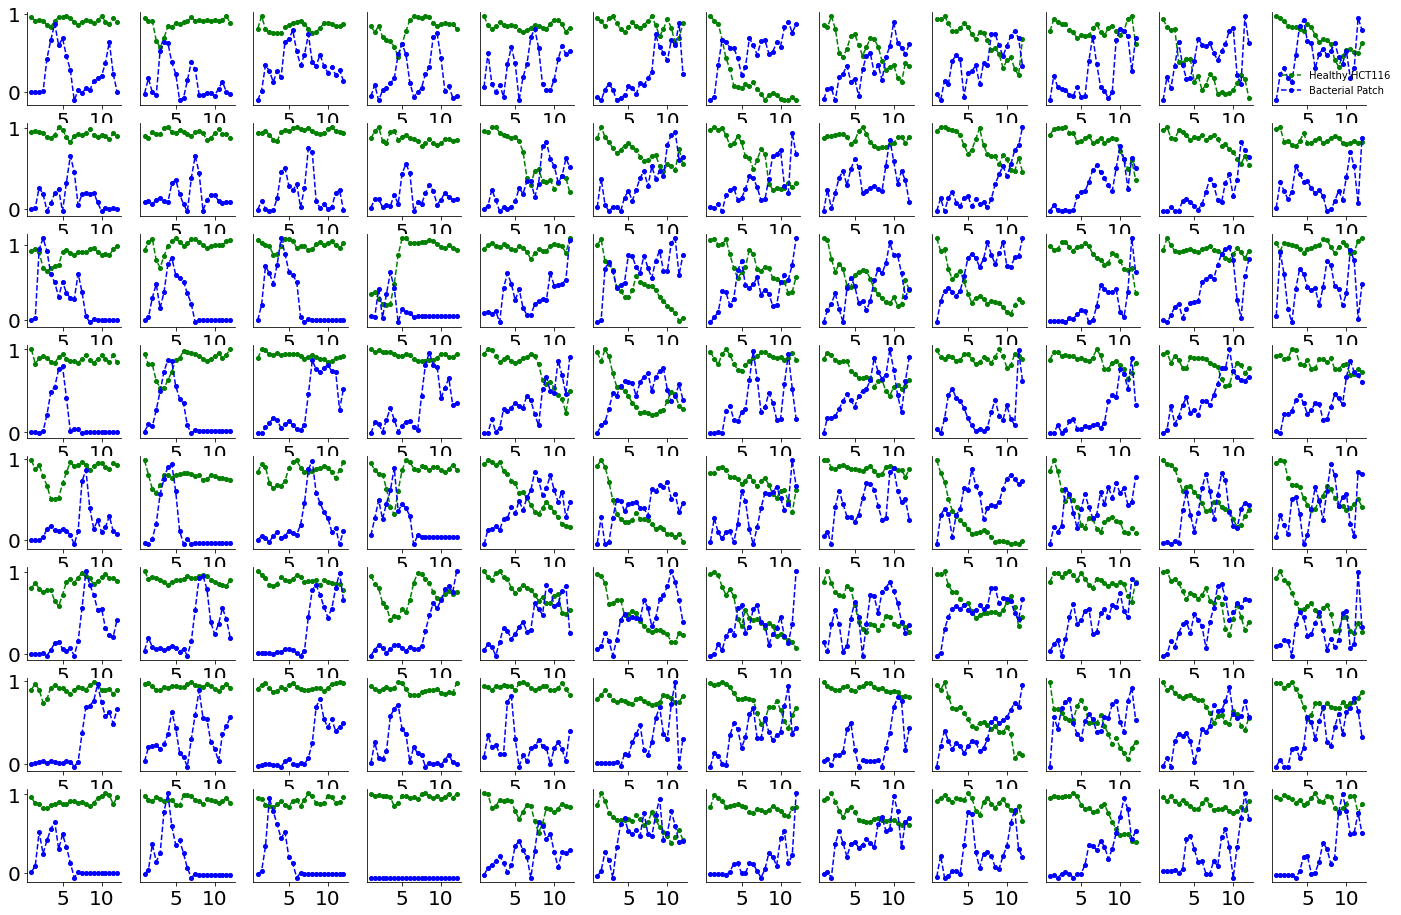

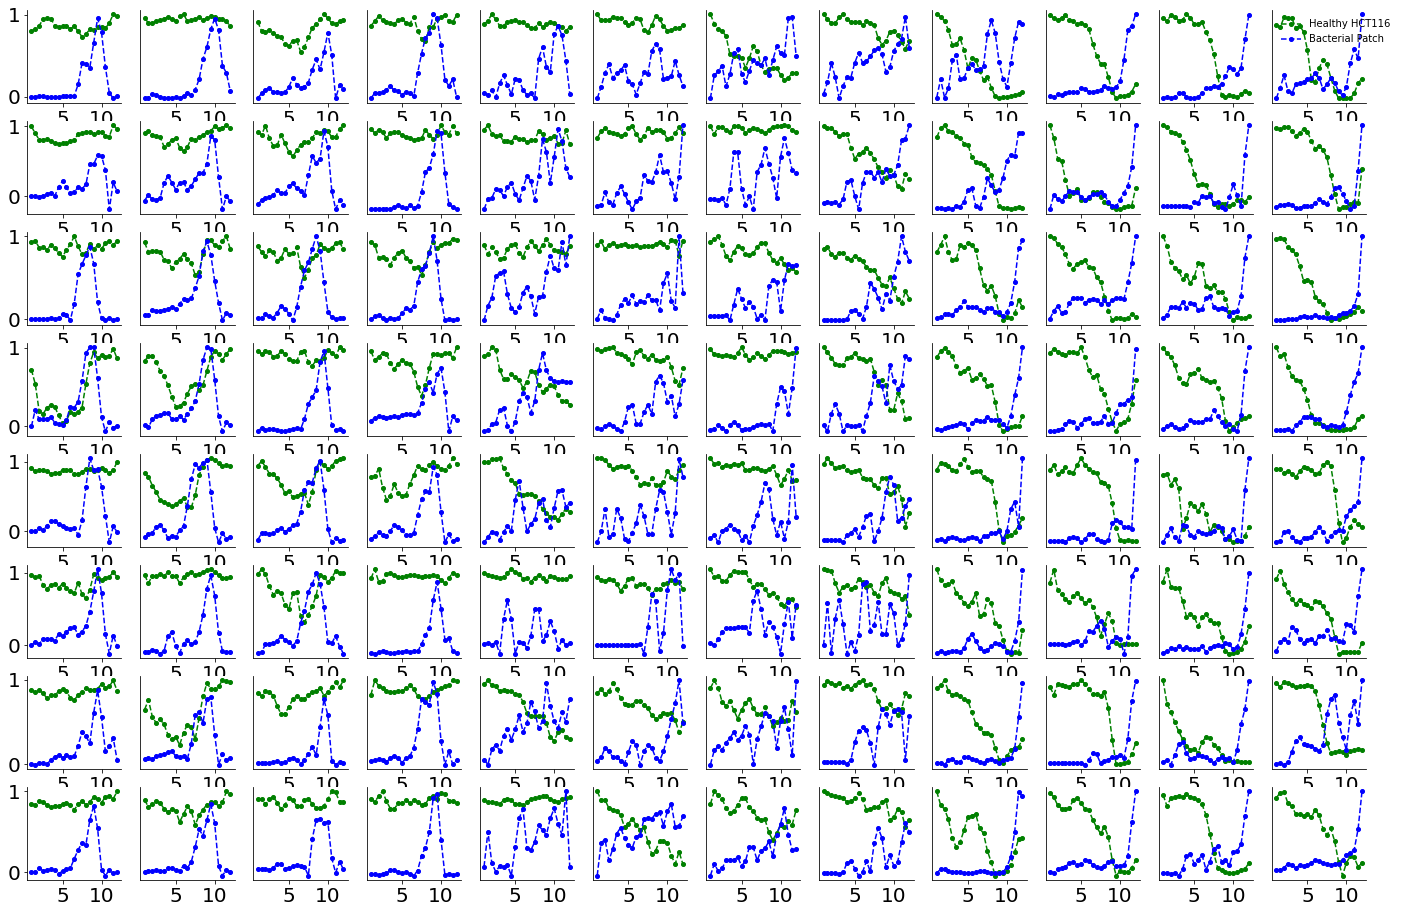

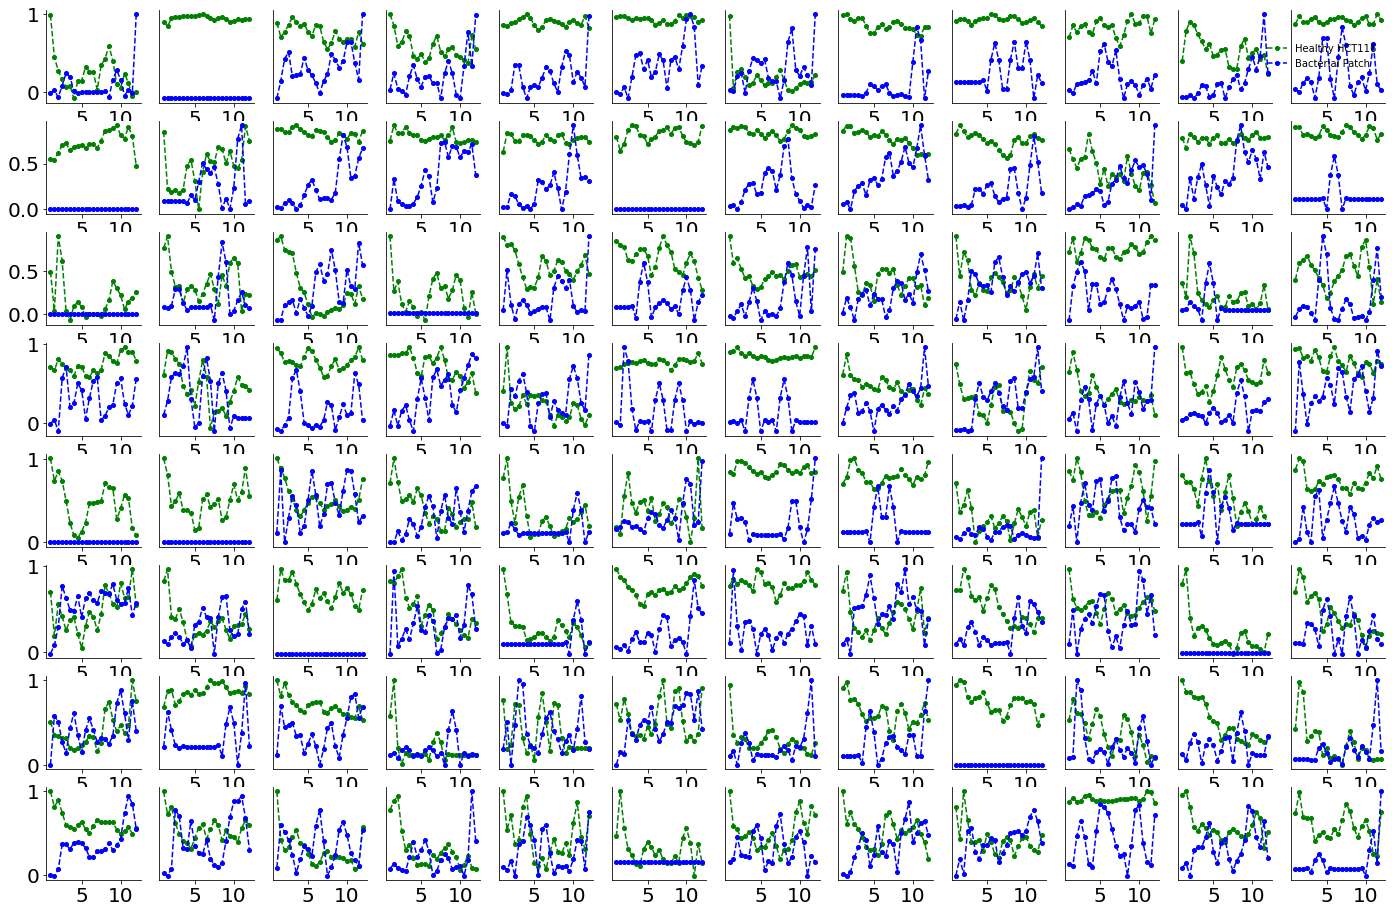

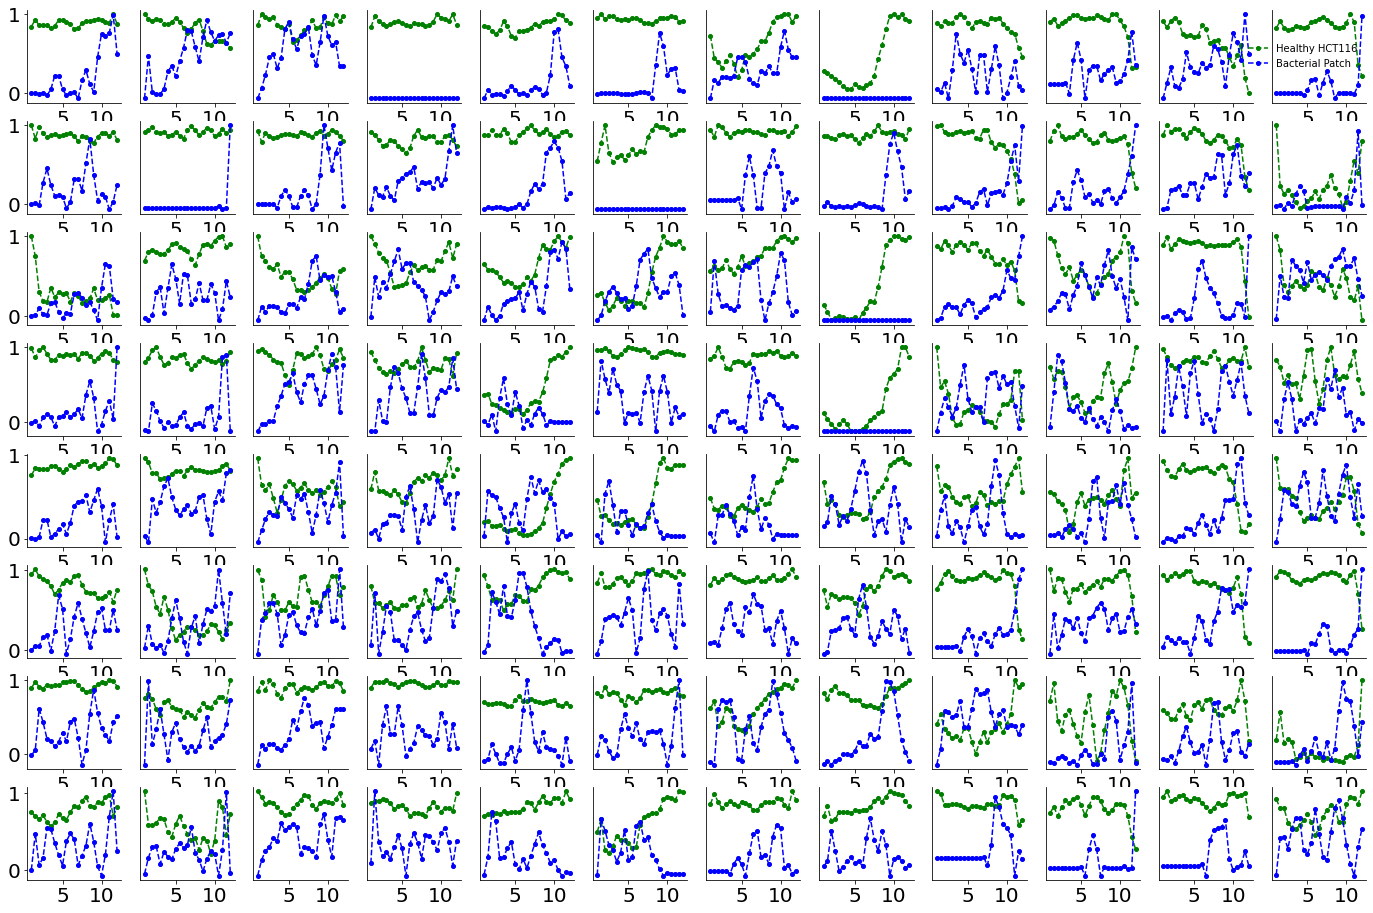

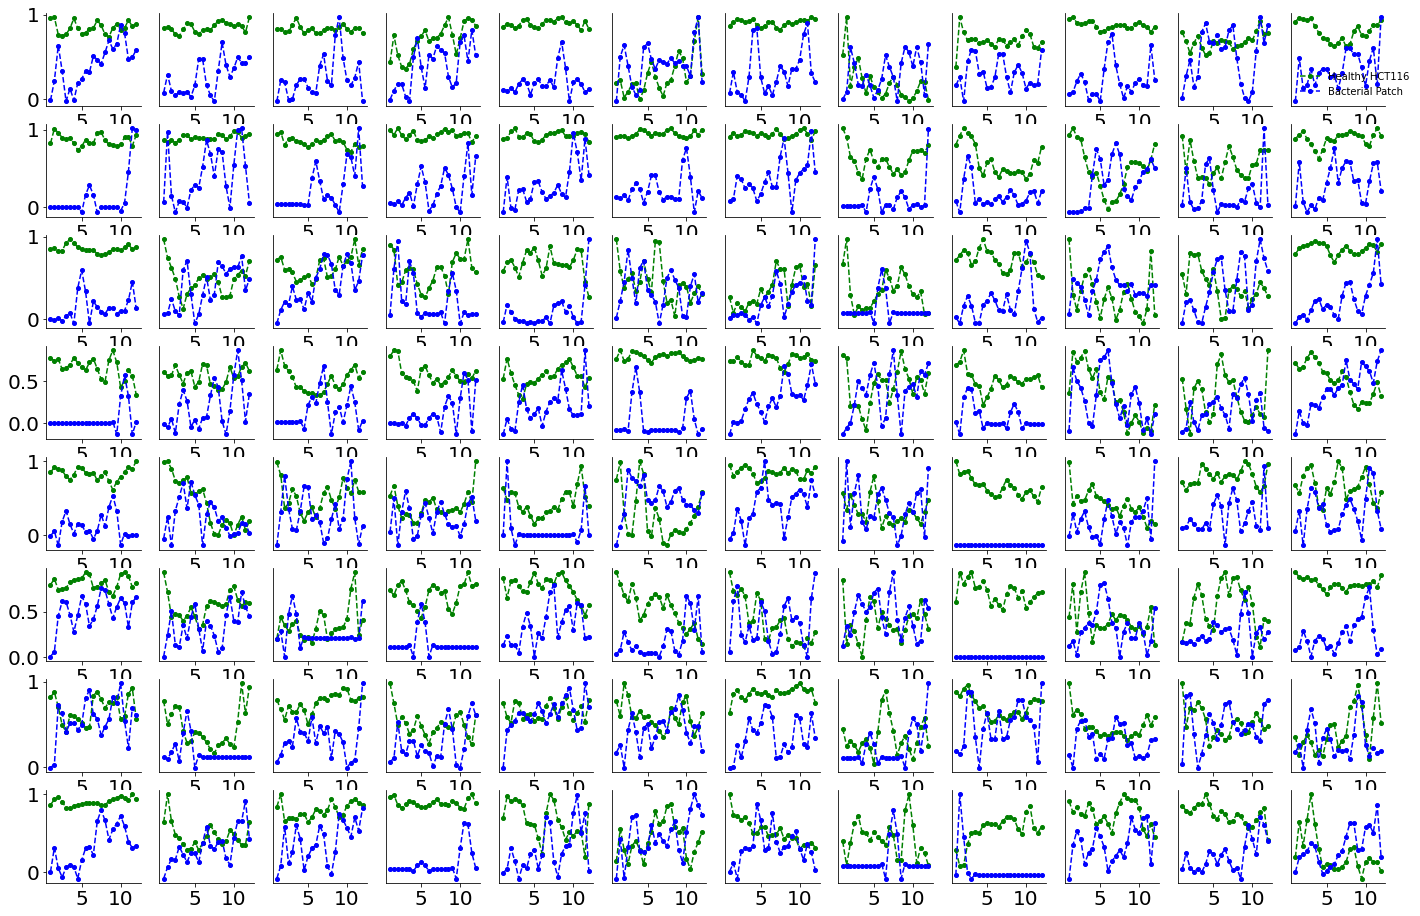

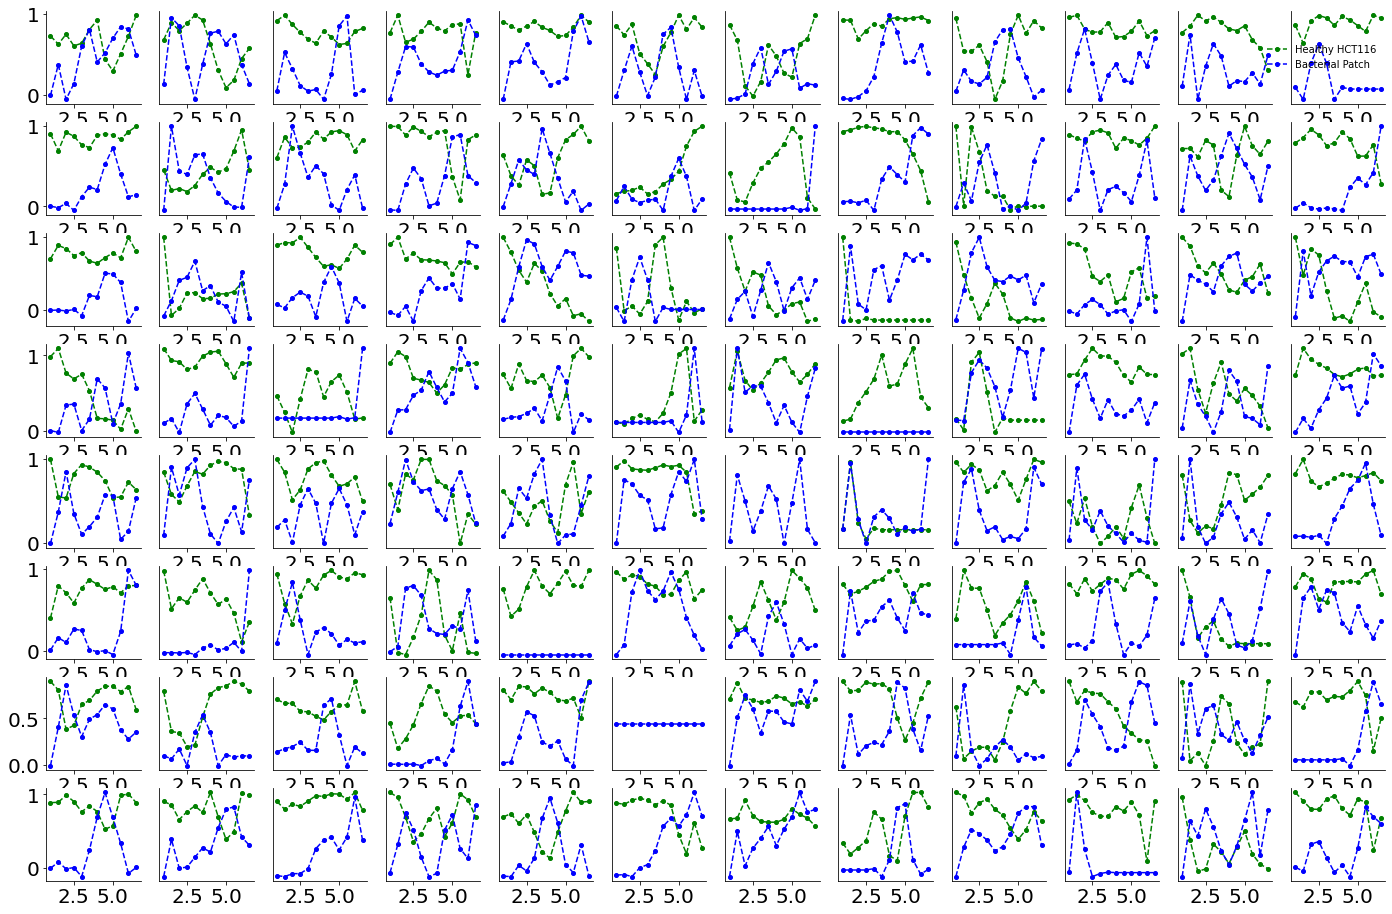

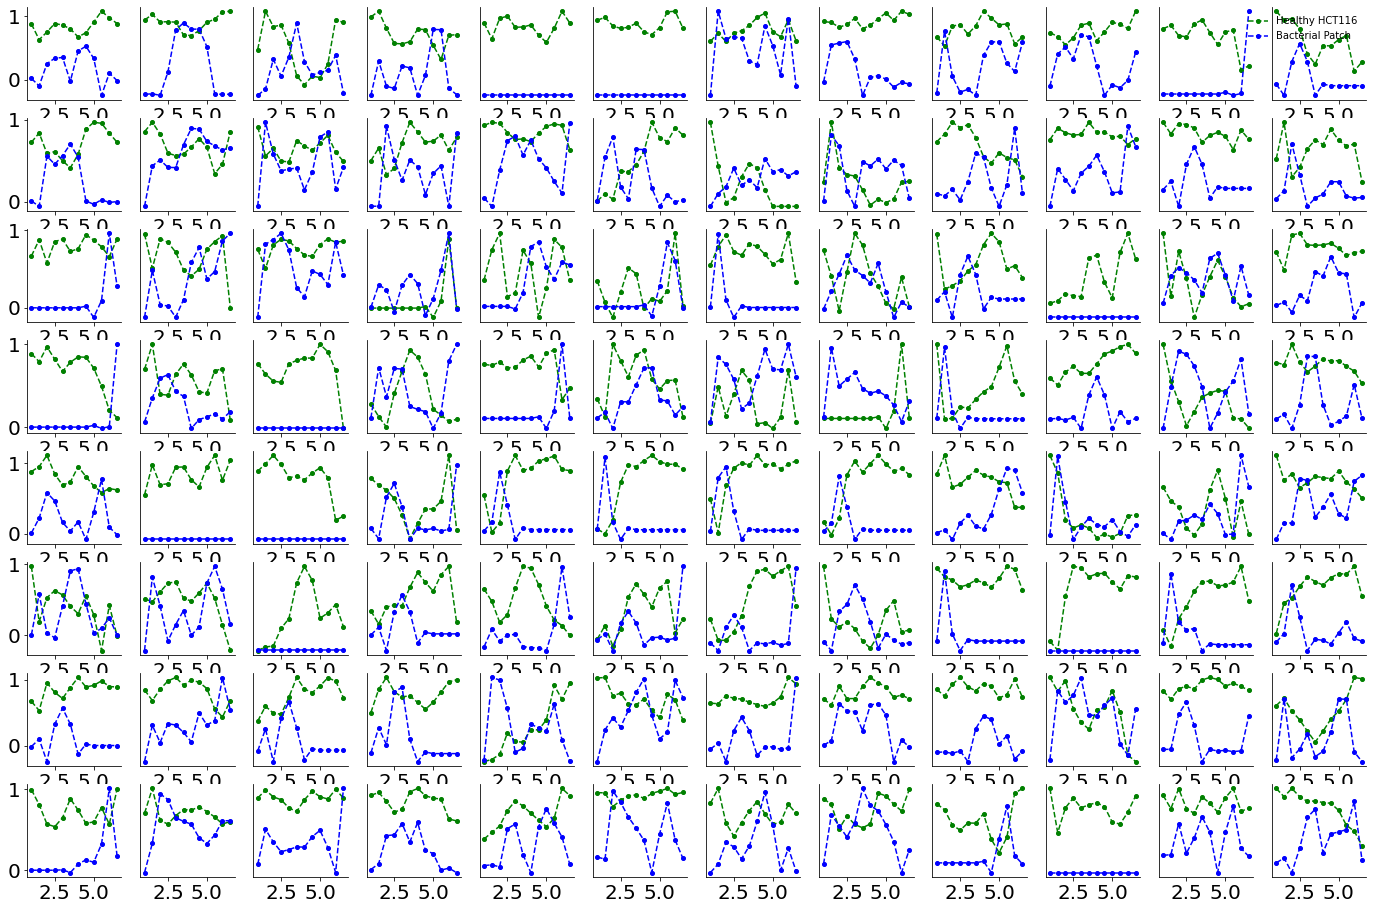

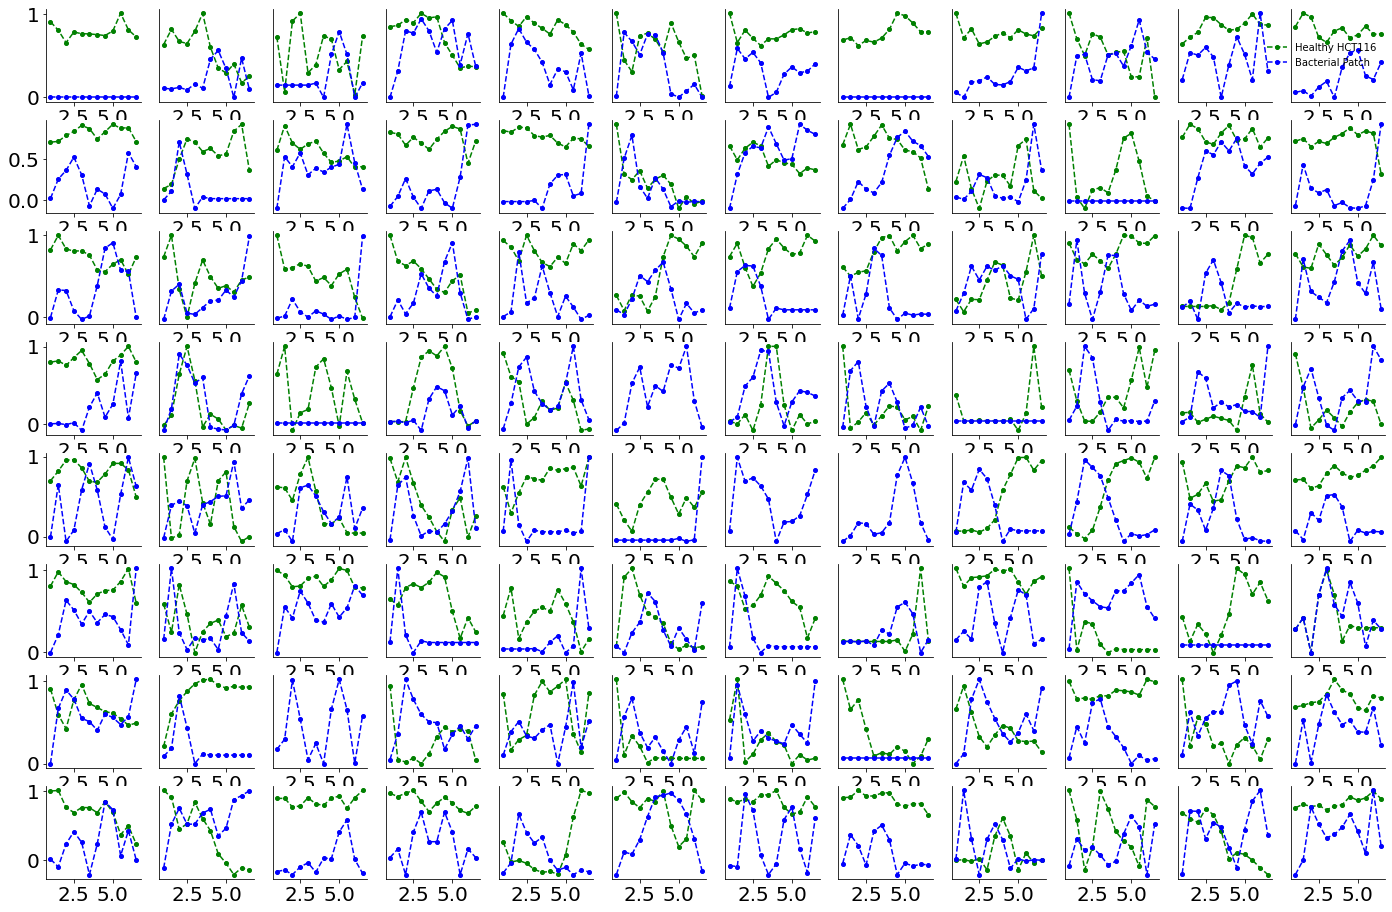

ValueError: zero-size array to reduction operation maximum which has no identity

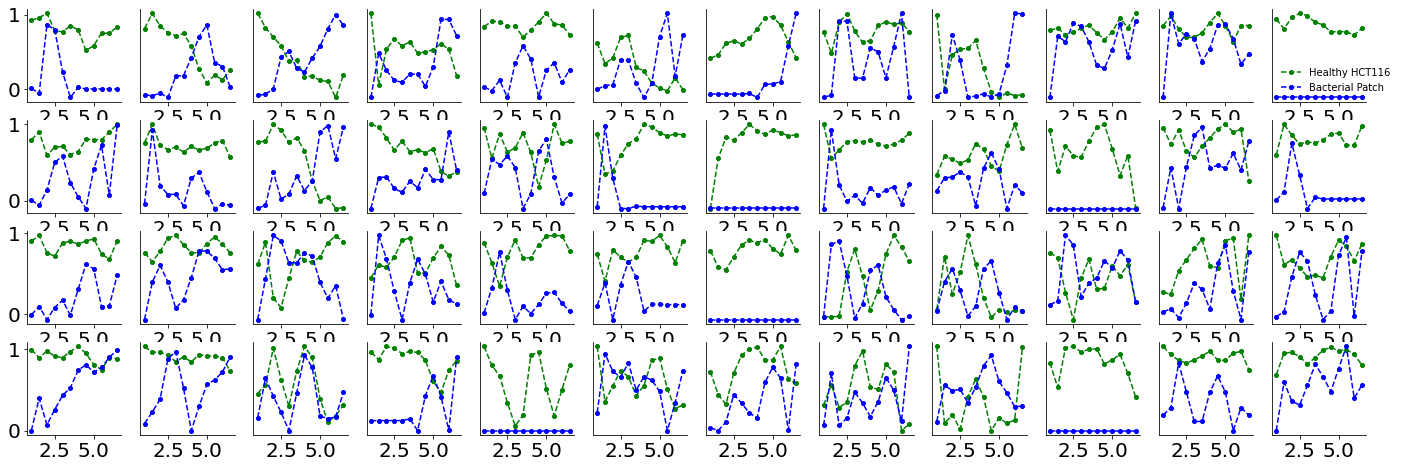

In [11]:
for filename in os.listdir(Pickle_Path):
    if '_HCT116.pickle' in filename: 
        output_file = open(Pickle_Path+'/'+filename,'rb'); 
        feature_dict = pickle.load(output_file);
        #print(feature_dict)
        all_row_ind = ['A','B','C','D','E','F','G','H']
        all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12']

        plt.figure(figsize=(24,16))
        for row_ind in range(0,len(all_row_ind)):
            for col_ind in range(0,len(all_col_ind)):
                this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
                time_keys = list(feature_dict[this_well].keys());
                time_keys.sort()
                for kernel_ind in [0,2]:
                    kernel =  kernel_names[kernel_ind];
                    if kernel_ind==2:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = [np.max([elem-ys[0],0]) for elem in ys]
                        if not np.max(ys)==0:
                            ys = ys/(np.max(ys))
                    if kernel_ind==0:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                    if kernel_ind ==1:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                        ys = [np.max([elem-ys[0],0]) for elem in ys]
                    times = [np.float(np.int(elem)*30.0/60.0) for elem in time_keys]
                    subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white',)
                    if len(time_keys)>0:
                        ys = savgol_filter(ys, 7, 5) # window size 51, polynomial order 3
                    subax.plot(times,ys,'.--',ms=8,color=list_of_colors[kernel_ind])
                    #subax.xlabel('Time (Hrs)',size=20)
                    #subax.ylabel('# of Clusters Estim.',size=20)
                    #ax = plt.gca()
                    #plt.ylim([0,1.0])
                    #subax.set_yscale('log')
                subax.spines['right'].set_visible(False)
                subax.spines['top'].set_visible(False)   
                #if not (row_ind ==7):
                #subax.get_xaxis().set_ticks([repr(np.int(elem)*30.0/60.0) for elem in time_keys])
                if not (col_ind ==0):
                    subax.get_yaxis().set_ticks([])
                if row_ind==0 and col_ind==11:
                    plt.legend(['Healthy HCT116','Bacterial Patch'],fontsize=10,frameon=False)
        #        subax.set_facecolor('gray')

        plt.show()
        
        

In [12]:
StrainNameList = ['Negative Control','S. epidermis 1457','E. faecalis OG1RF','S. aureus MW2','A. baumannii 5075','P. aeruginosa PA01', \
                  'Y. pseudotuberculosis','E. coli ETEC','E. coli (chicken)','E. coli EHEC','S. enterica','C. diptheriae', \
                  'C. amycolatum','S. aureus UAMS-1','C. bovis','S. capitis','K. oxytoca','K. pseunomiae','E. coli UPEC','B. cereus', \
                  'S. agalactiae','L. monocytogenes 6656','L. innocua','P. putida','P. aeruginosa 8890-80','S. pneumonia WU2','A. baylyi','D. radiodurans','E. anopheles','S. rubidaea', 'A. bartoniae']
                  
                  

In [13]:
feature_dict


{'A1': {'02': {'hHCT116': 11, 'bp': 157},
  '07': {'hHCT116': 12, 'bp': 156},
  '08': {'hHCT116': 9, 'bp': 154},
  '13': {'hHCT116': 10, 'bp': 151},
  '03': {'hHCT116': 12, 'bp': 150},
  '04': {'hHCT116': 11, 'bp': 162},
  '05': {'hHCT116': 11, 'bp': 164},
  '11': {'hHCT116': 9, 'bp': 152},
  '09': {'hHCT116': 6, 'bp': 149},
  '12': {'hHCT116': 9, 'bp': 154},
  '06': {'hHCT116': 7, 'bp': 152},
  '10': {'hHCT116': 7, 'bp': 157}},
 'A2': {'13': {'hHCT116': 3, 'bp': 165},
  '07': {'hHCT116': 7, 'bp': 169},
  '10': {'hHCT116': 2, 'bp': 171},
  '03': {'hHCT116': 10, 'bp': 161},
  '06': {'hHCT116': 7, 'bp': 165},
  '04': {'hHCT116': 8, 'bp': 160},
  '05': {'hHCT116': 8, 'bp': 157},
  '08': {'hHCT116': 7, 'bp': 165},
  '09': {'hHCT116': 2, 'bp': 174},
  '02': {'hHCT116': 8, 'bp': 164},
  '11': {'hHCT116': 2, 'bp': 169},
  '12': {'hHCT116': 2, 'bp': 167}},
 'A3': {'04': {'hHCT116': 7, 'bp': 153},
  '09': {'hHCT116': 1, 'bp': 160},
  '08': {'hHCT116': 3, 'bp': 160},
  '12': {'hHCT116': 0, 'bp':

In [14]:
import seaborn as sns;

1


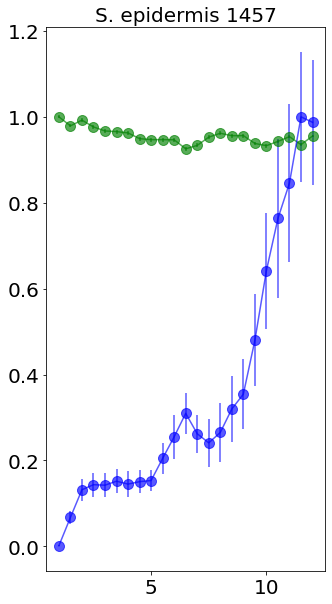

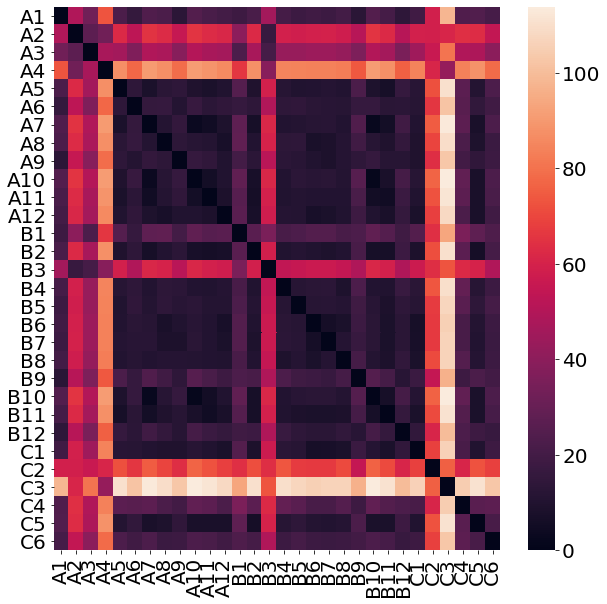

<Figure size 360x360 with 0 Axes>

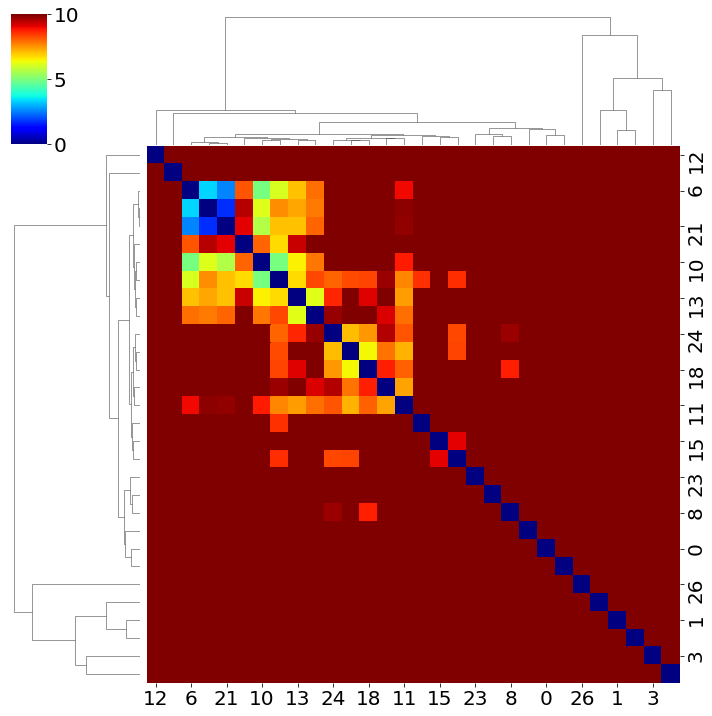

2


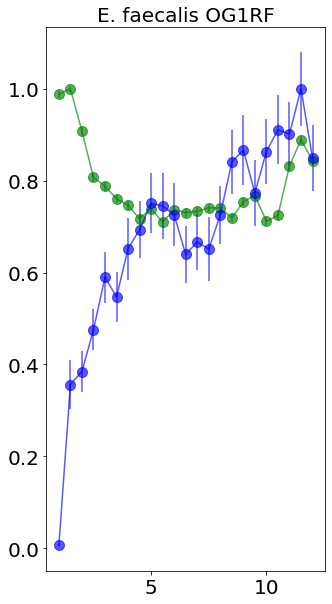

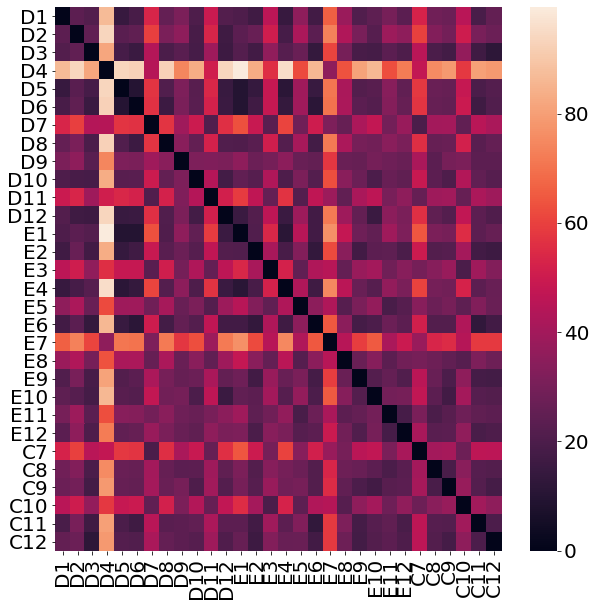

<Figure size 360x360 with 0 Axes>

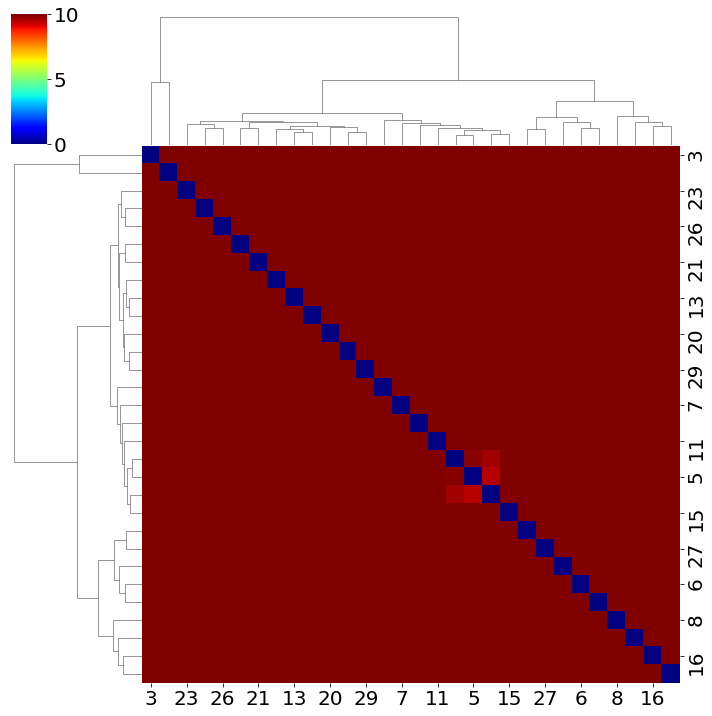

3


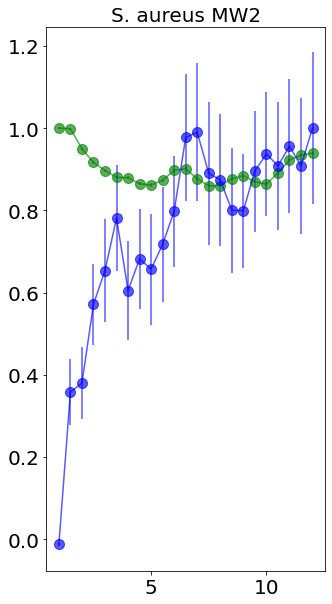

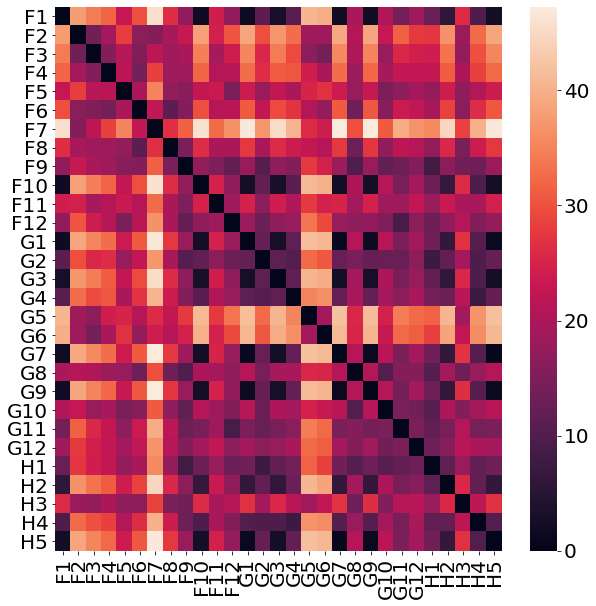

<Figure size 360x360 with 0 Axes>

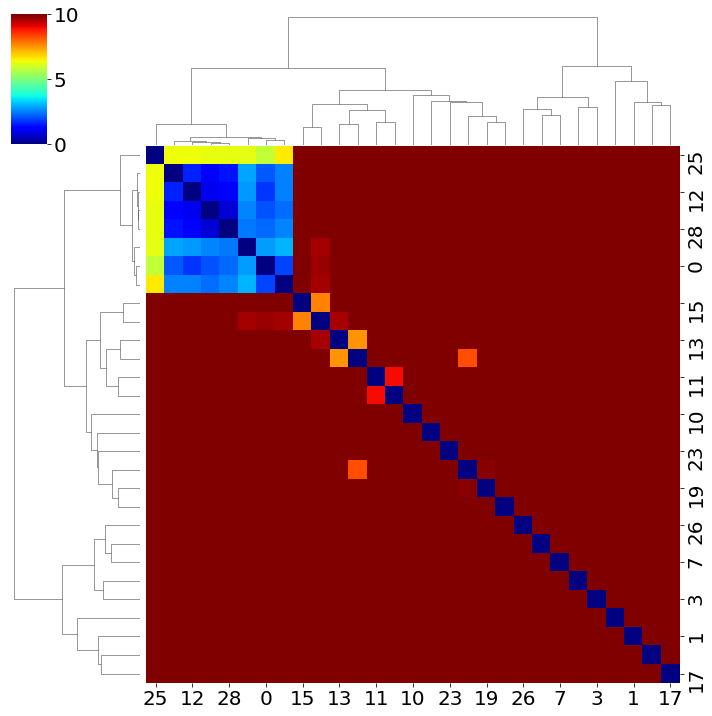

4


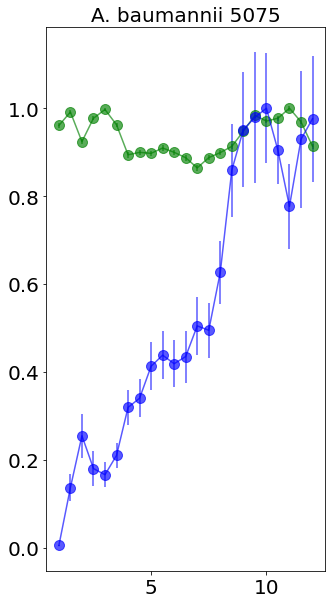

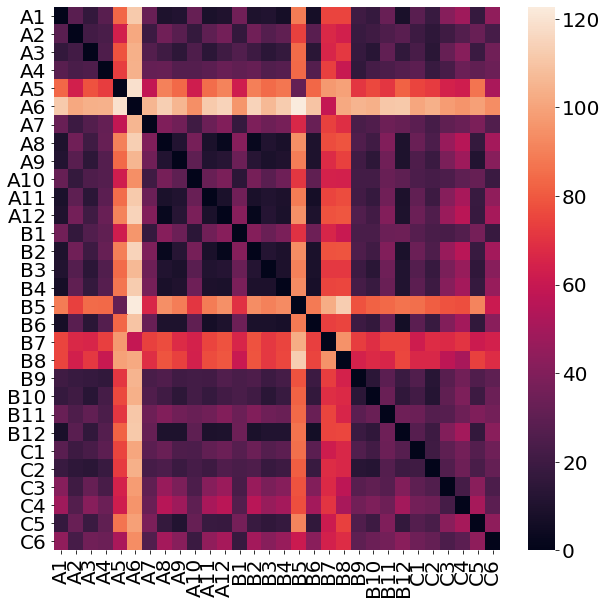

<Figure size 360x360 with 0 Axes>

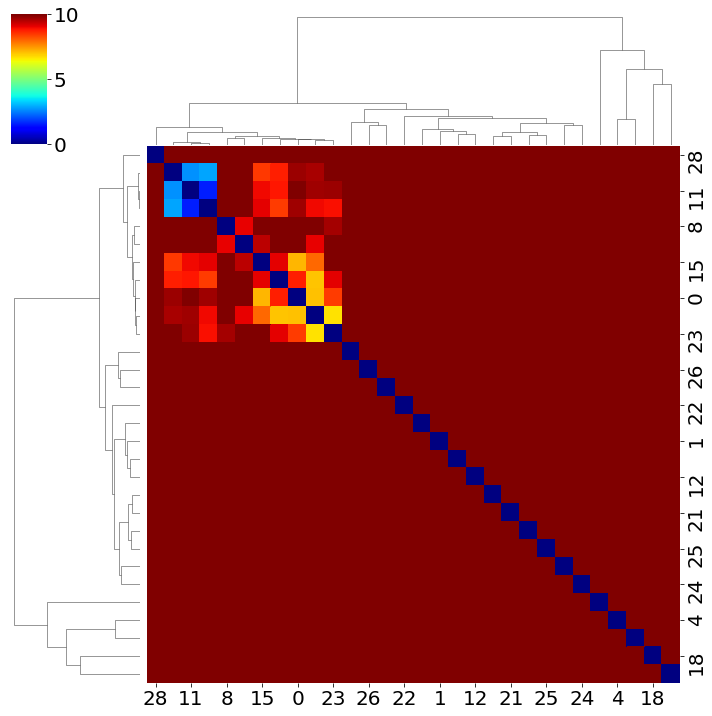

5


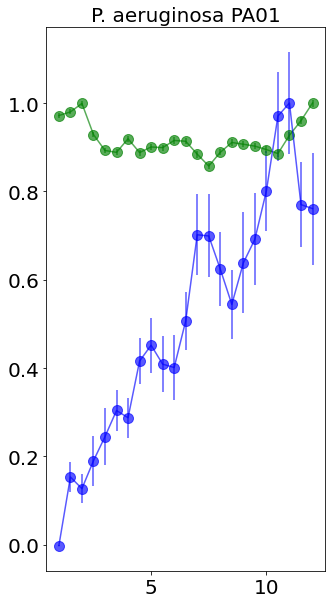

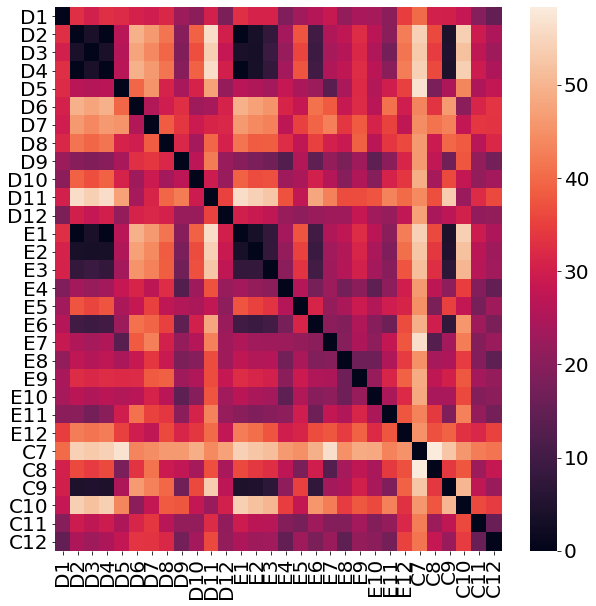

<Figure size 360x360 with 0 Axes>

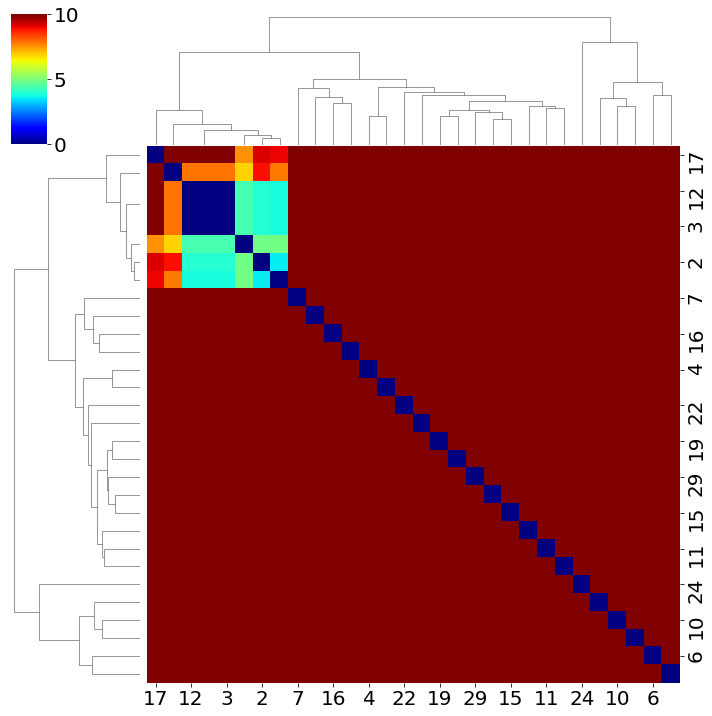

6


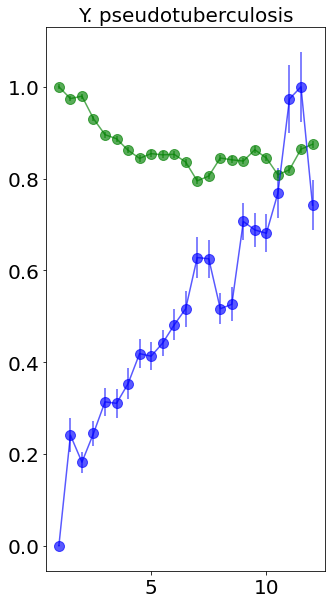

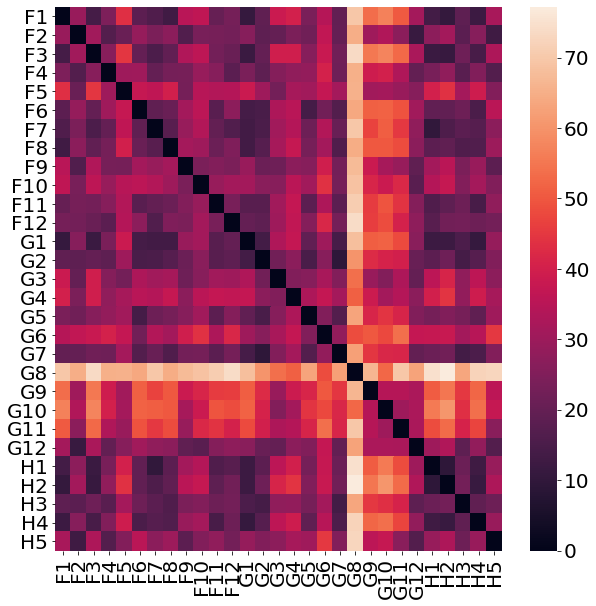

<Figure size 360x360 with 0 Axes>

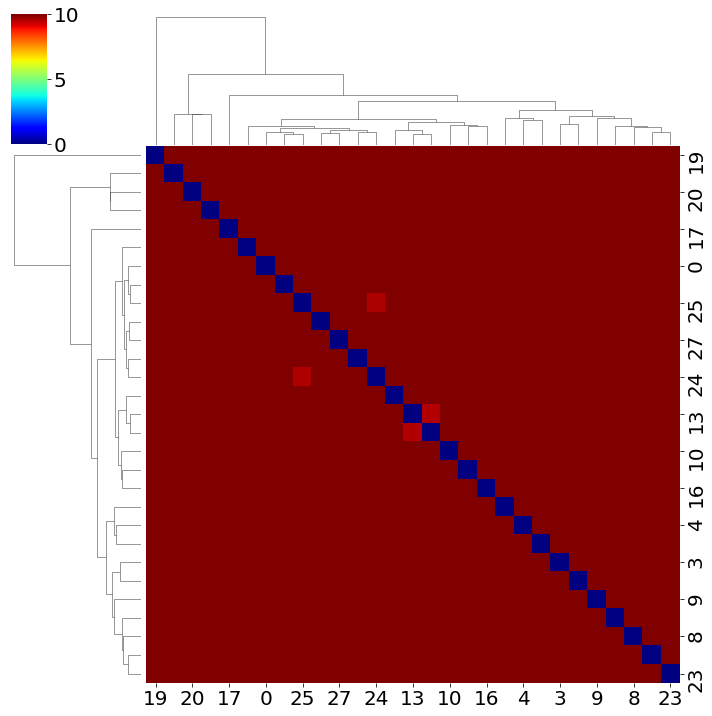

7


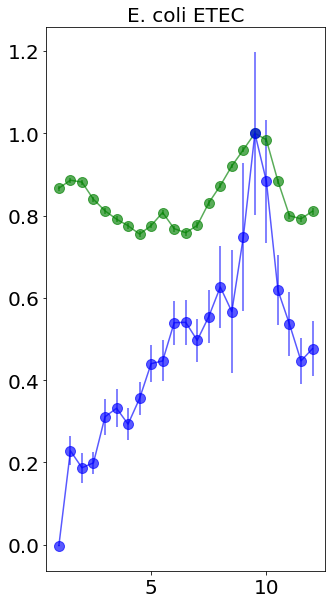

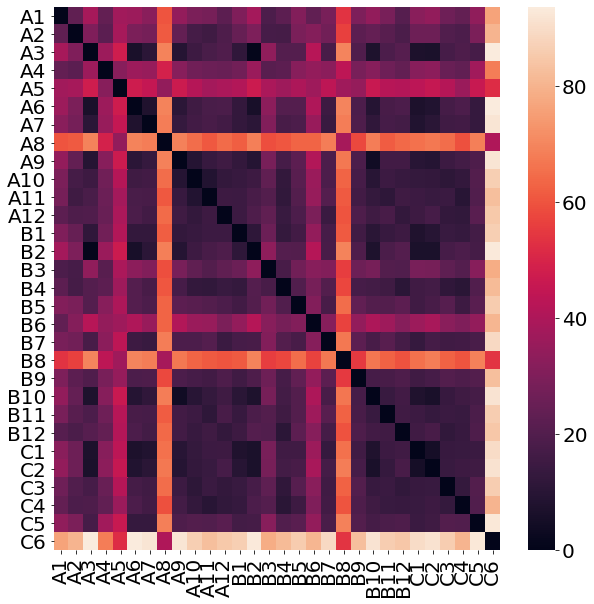

<Figure size 360x360 with 0 Axes>

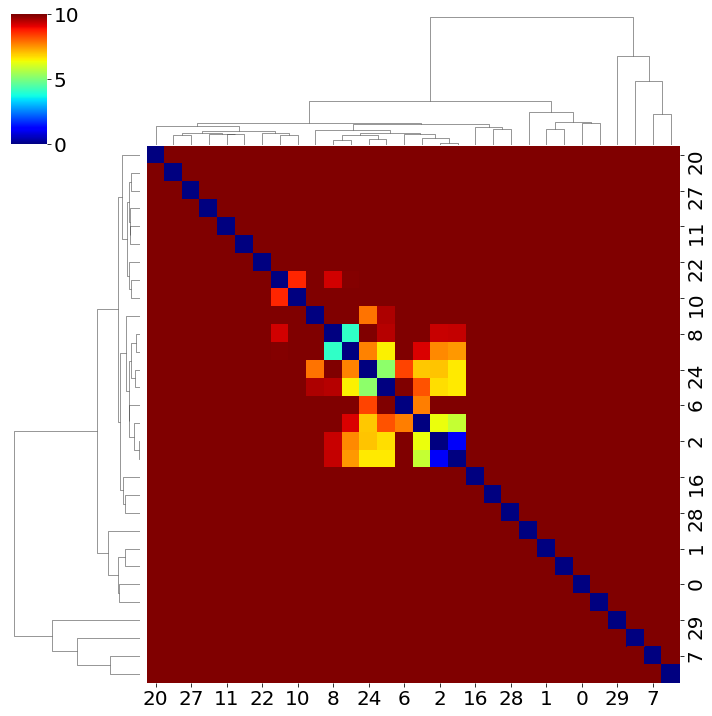

8


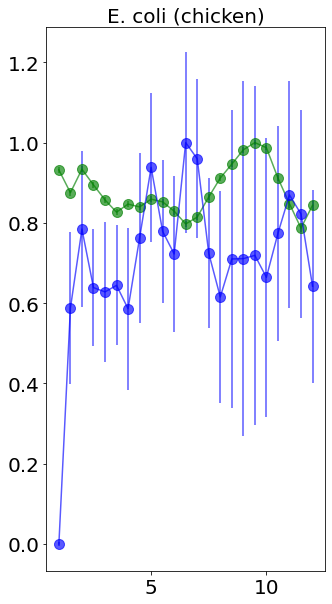

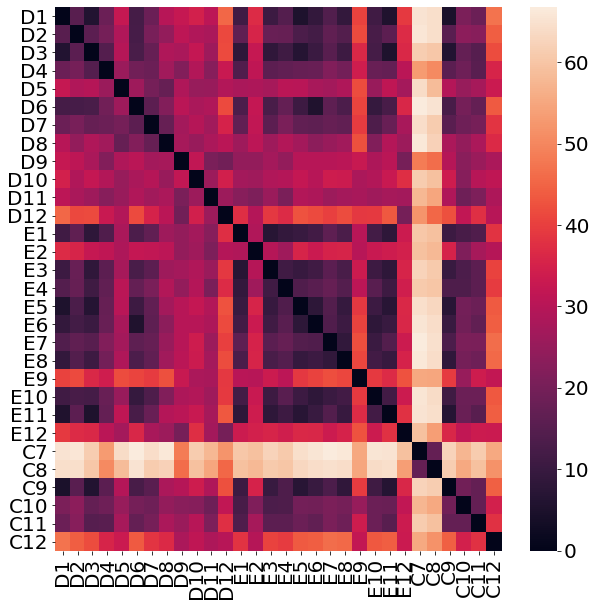

<Figure size 360x360 with 0 Axes>

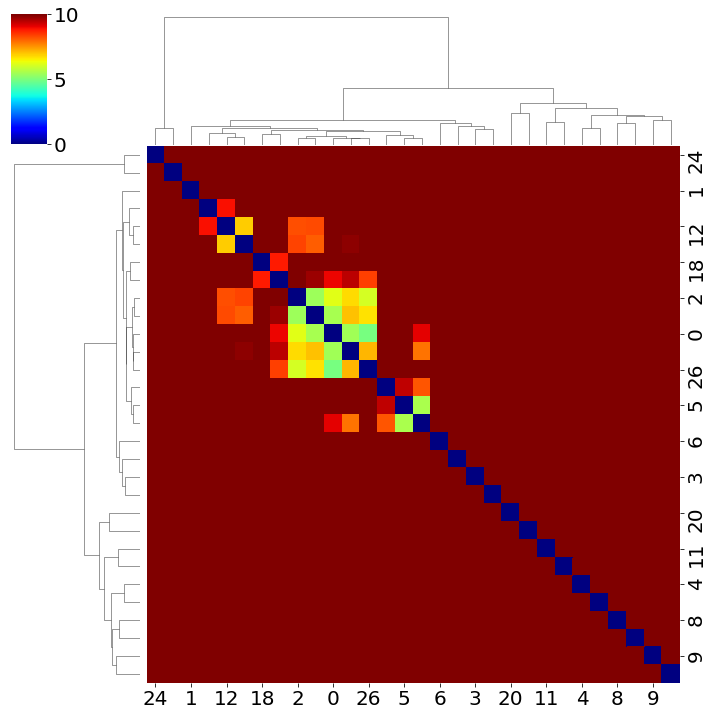

9


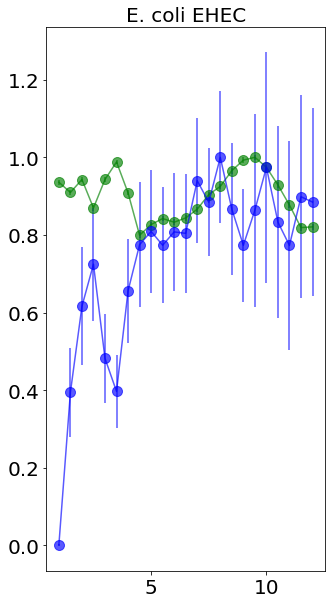

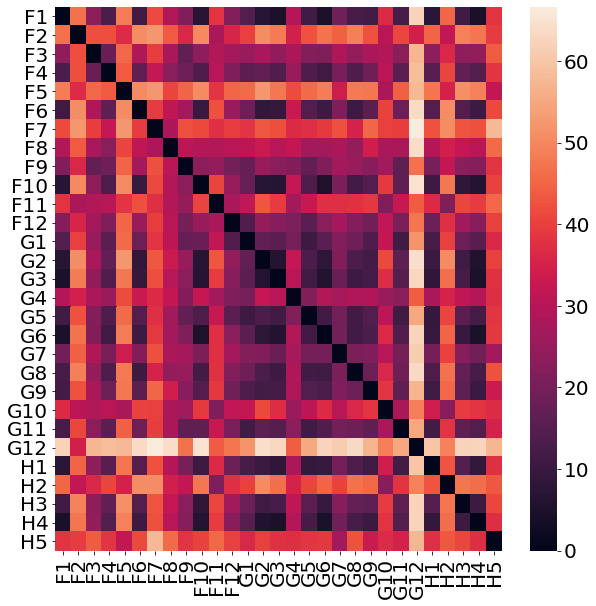

<Figure size 360x360 with 0 Axes>

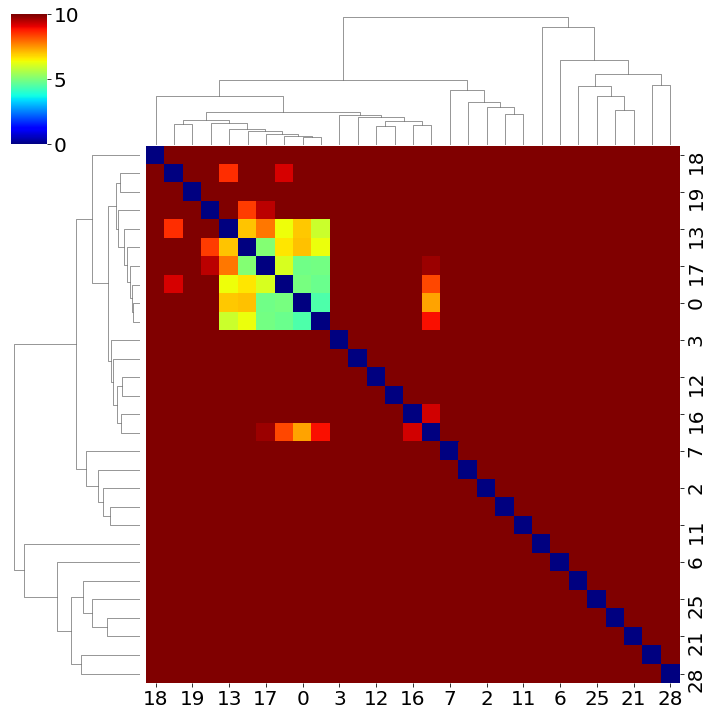

10


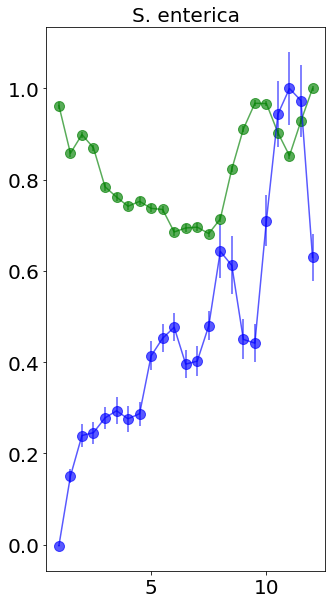

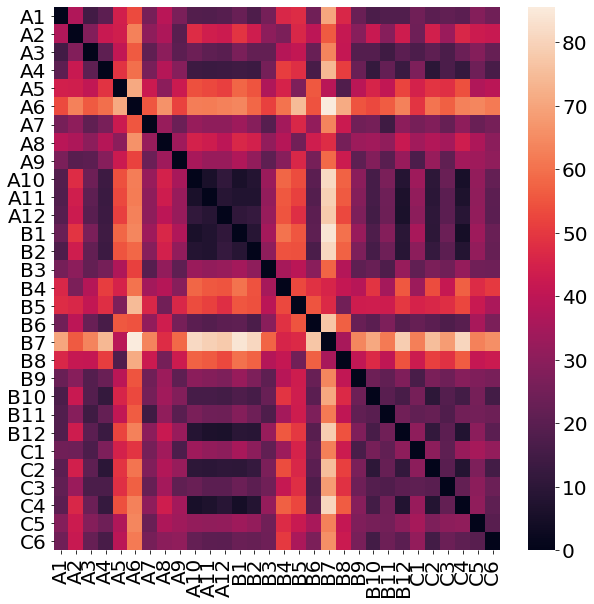

<Figure size 360x360 with 0 Axes>

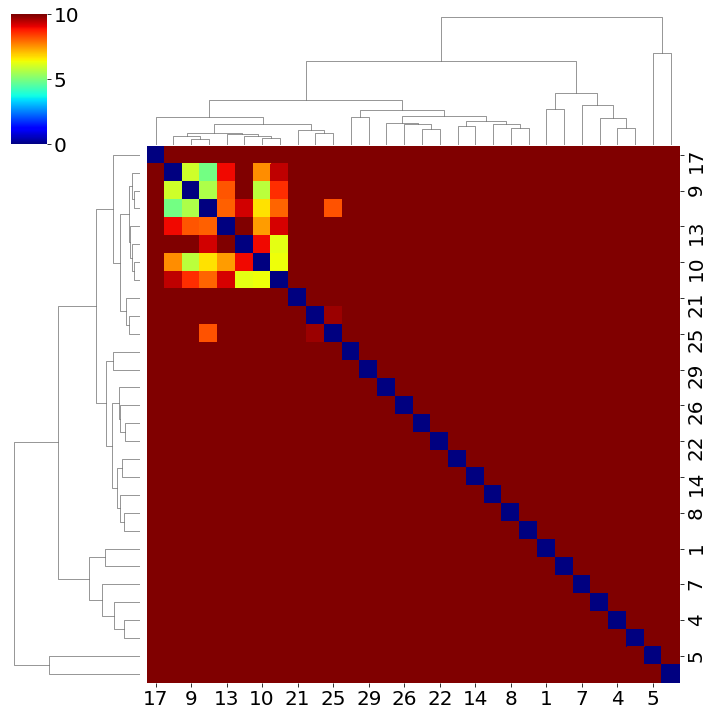

14


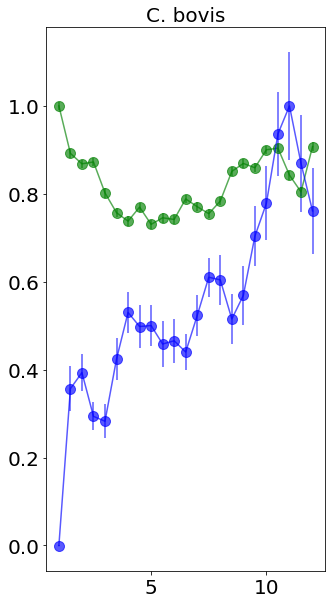

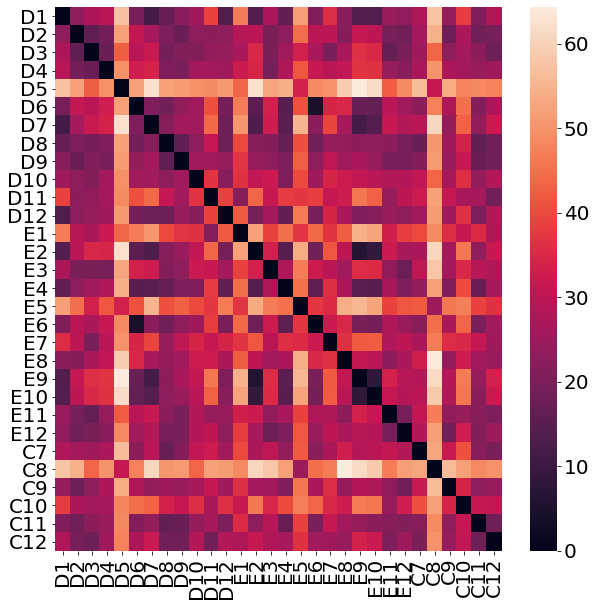

<Figure size 360x360 with 0 Axes>

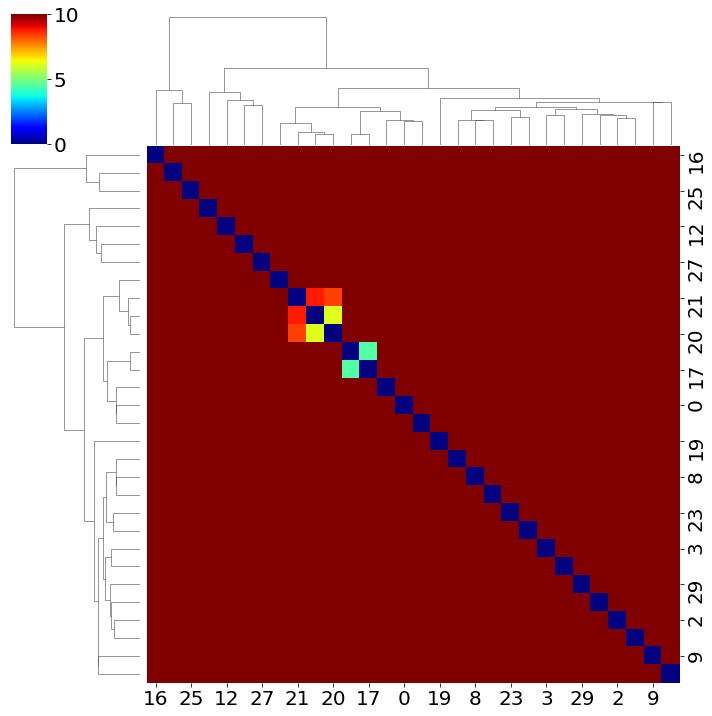

15


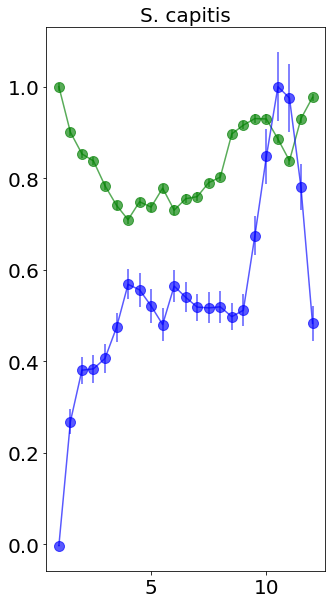

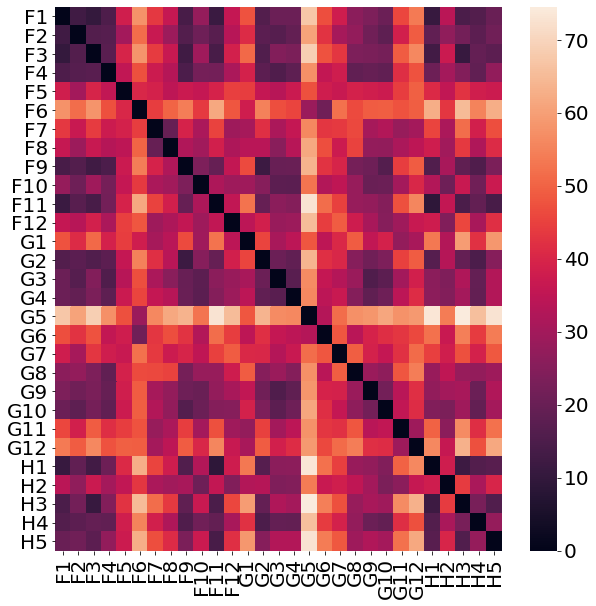

<Figure size 360x360 with 0 Axes>

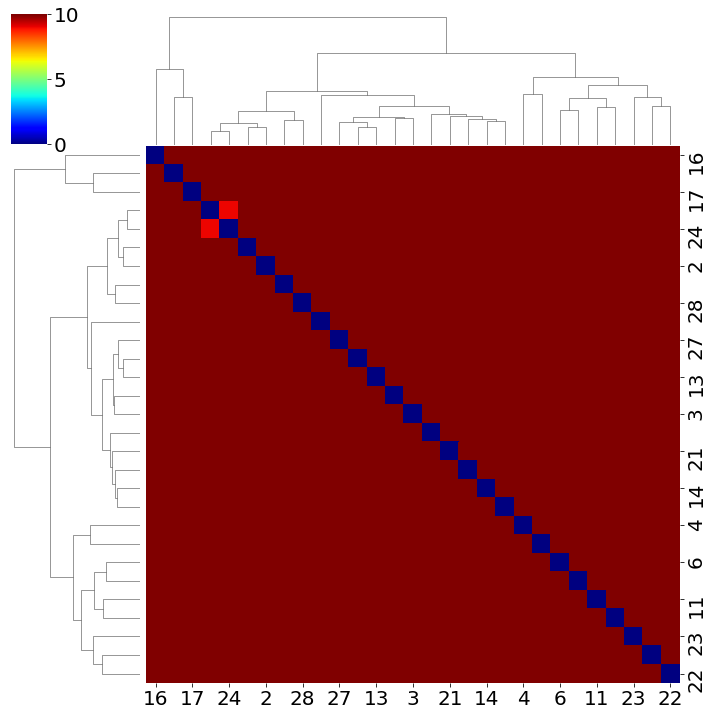

16


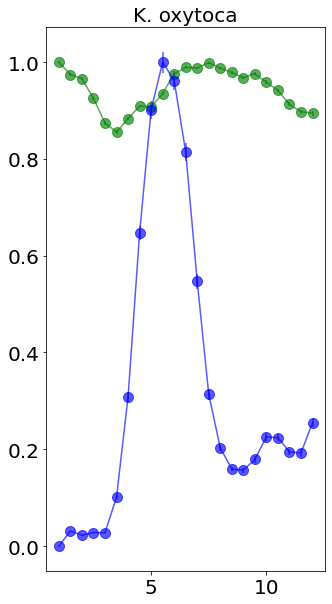

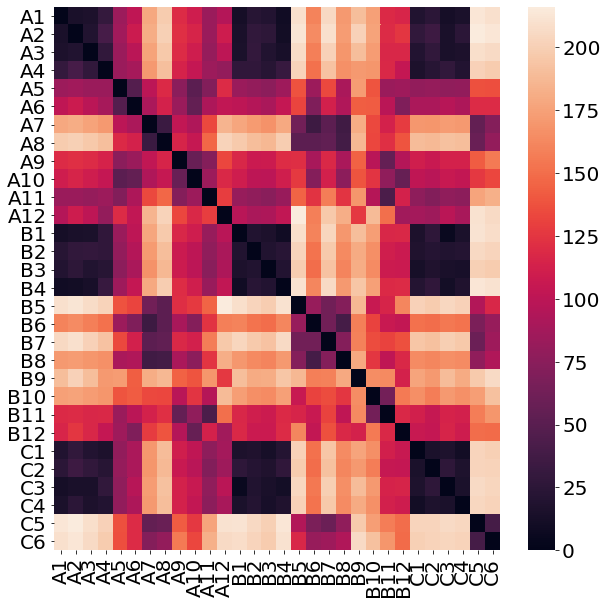

<Figure size 360x360 with 0 Axes>

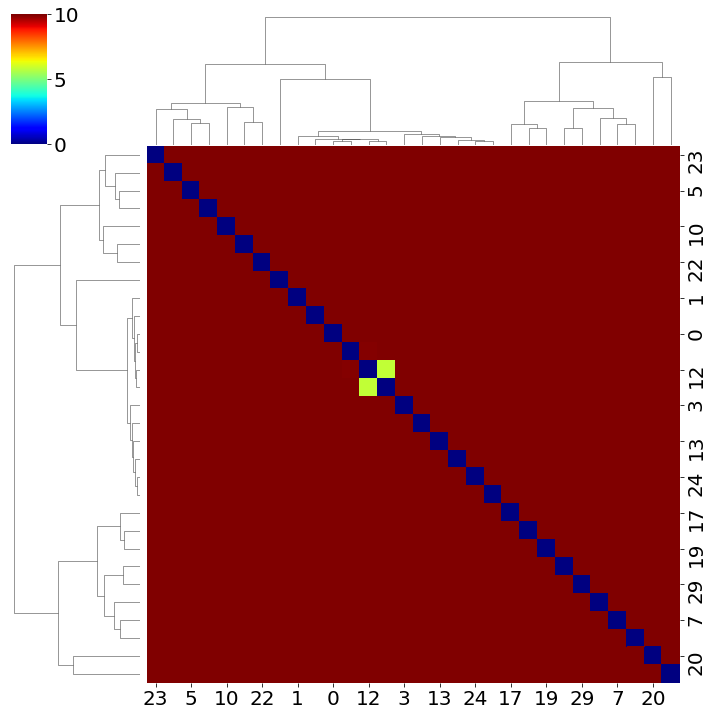

17


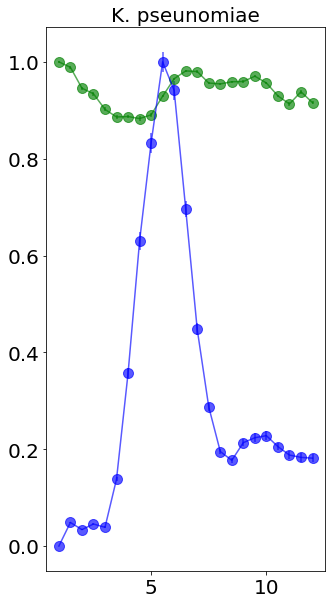

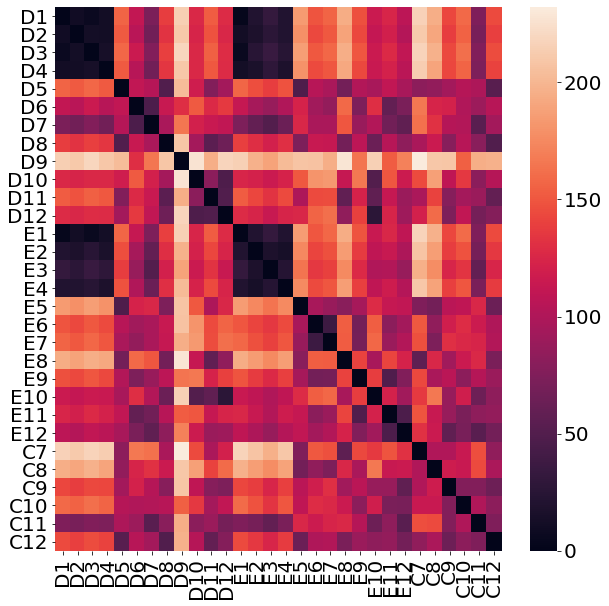

<Figure size 360x360 with 0 Axes>

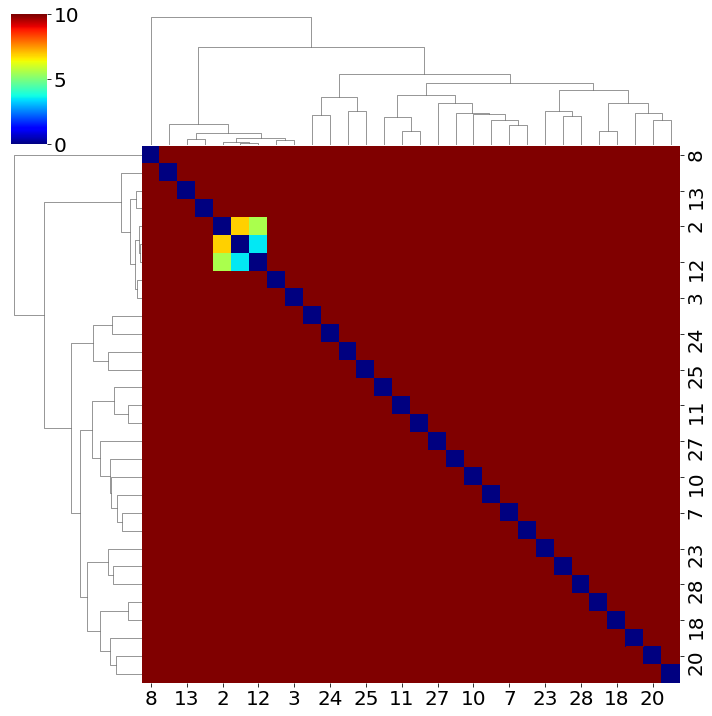

18


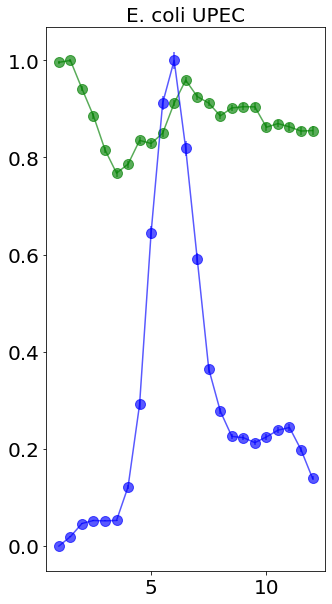

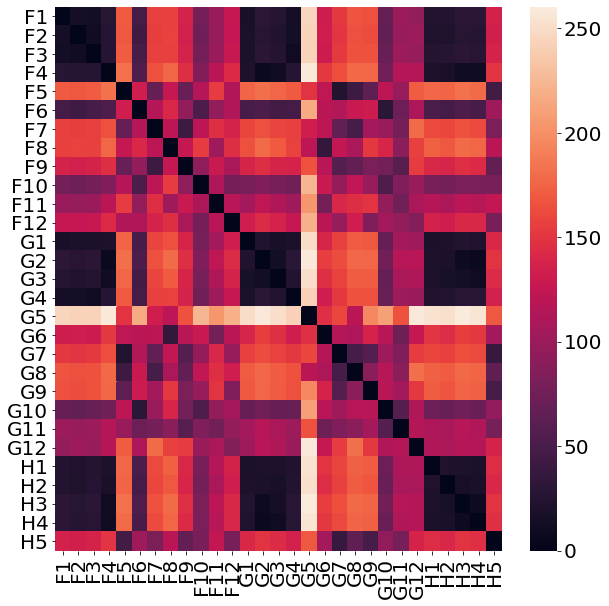

<Figure size 360x360 with 0 Axes>

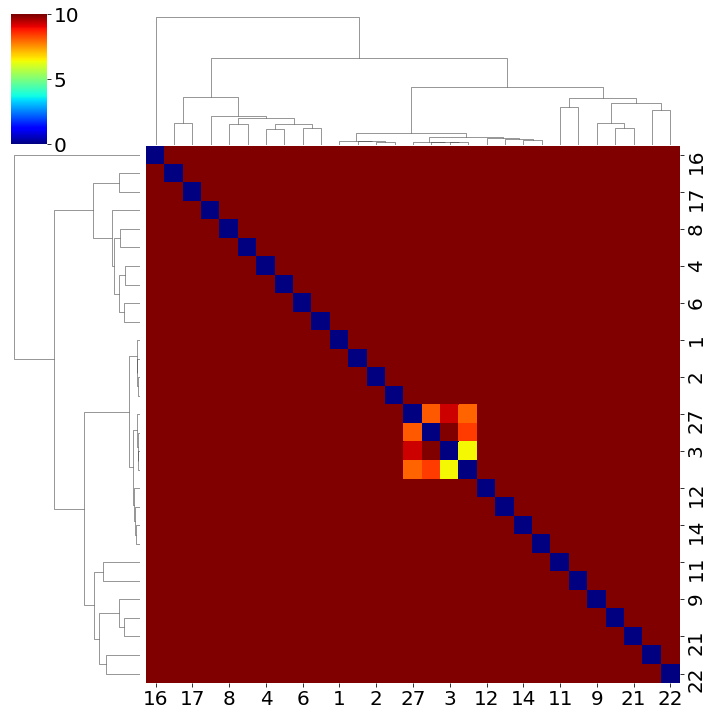

19


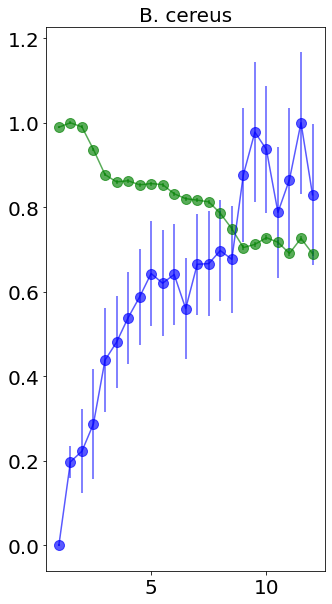

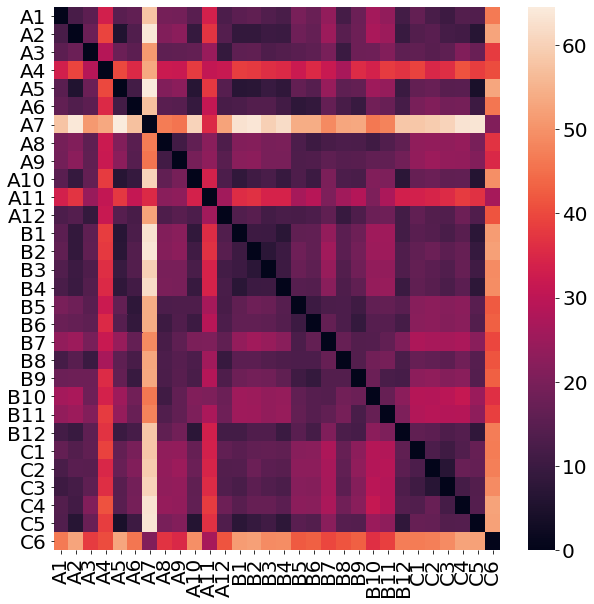

<Figure size 360x360 with 0 Axes>

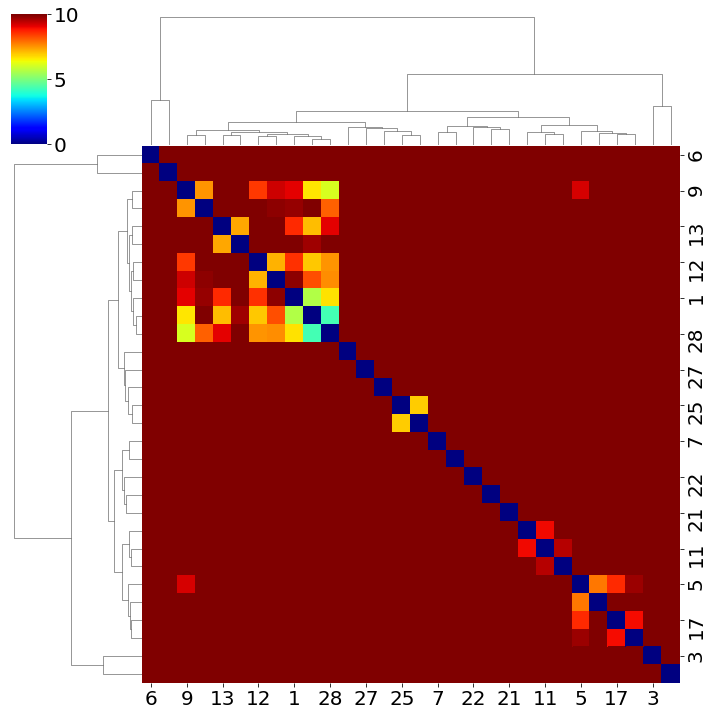

20


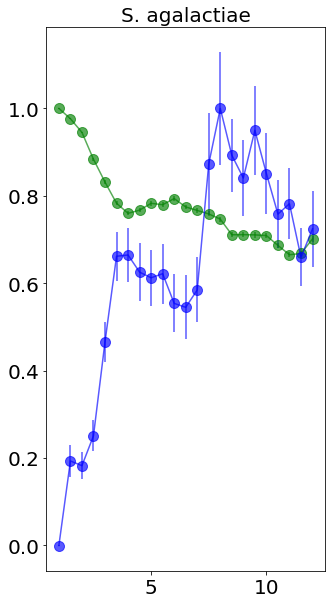

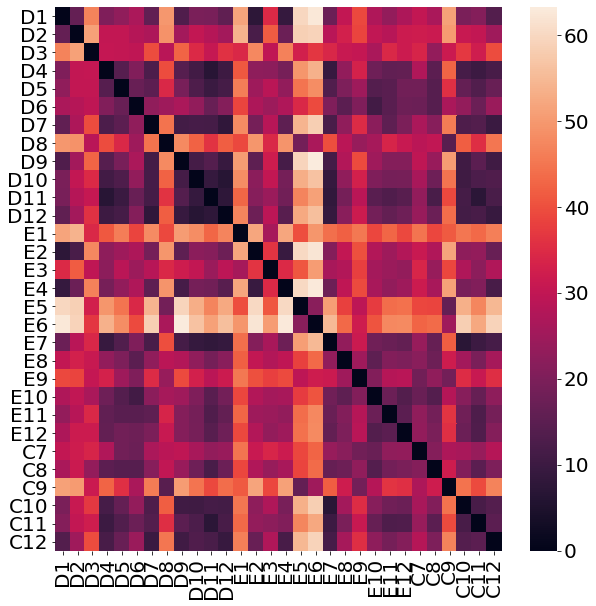

<Figure size 360x360 with 0 Axes>

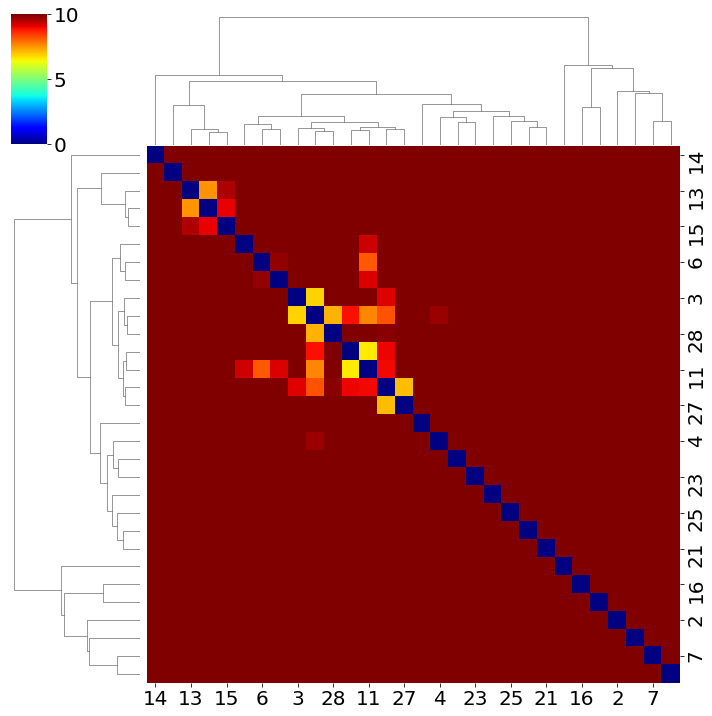

21


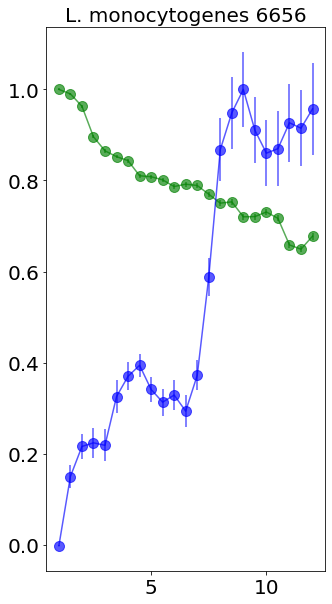

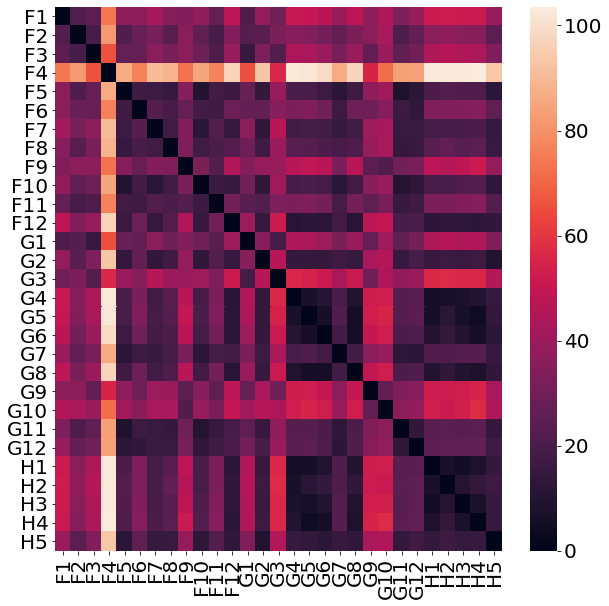

<Figure size 360x360 with 0 Axes>

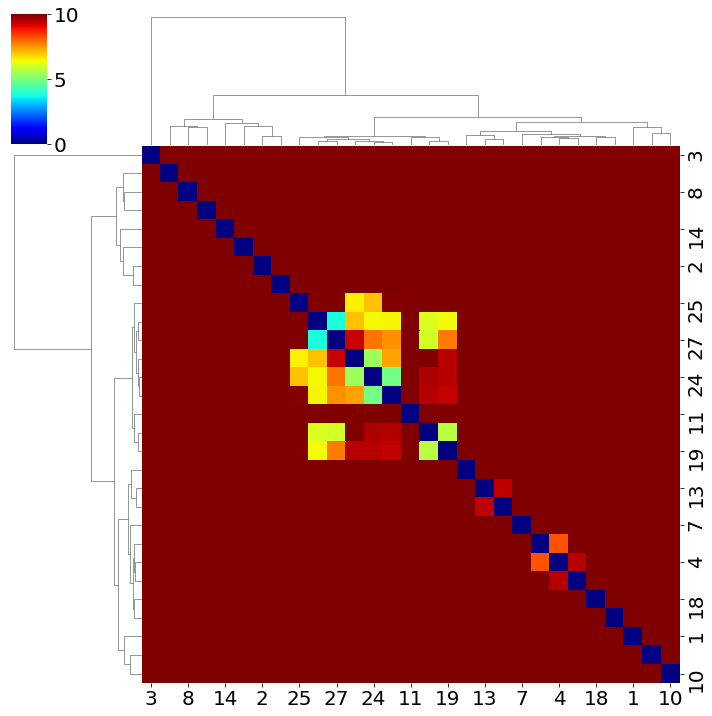

22


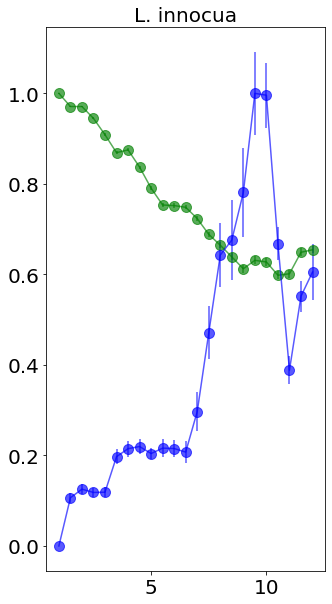

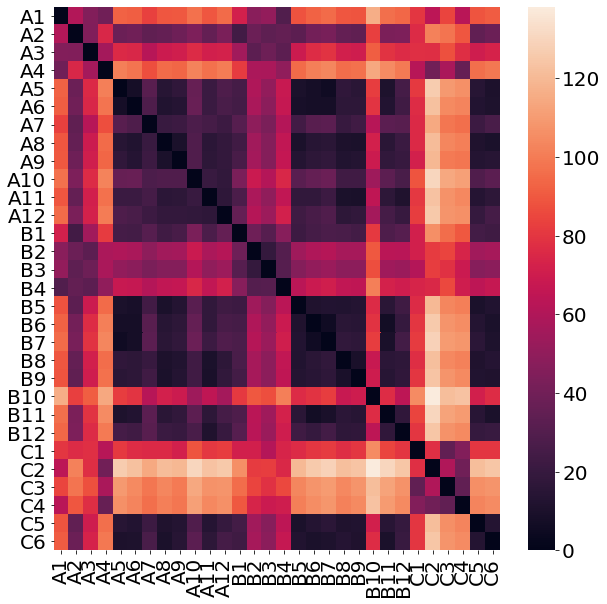

<Figure size 360x360 with 0 Axes>

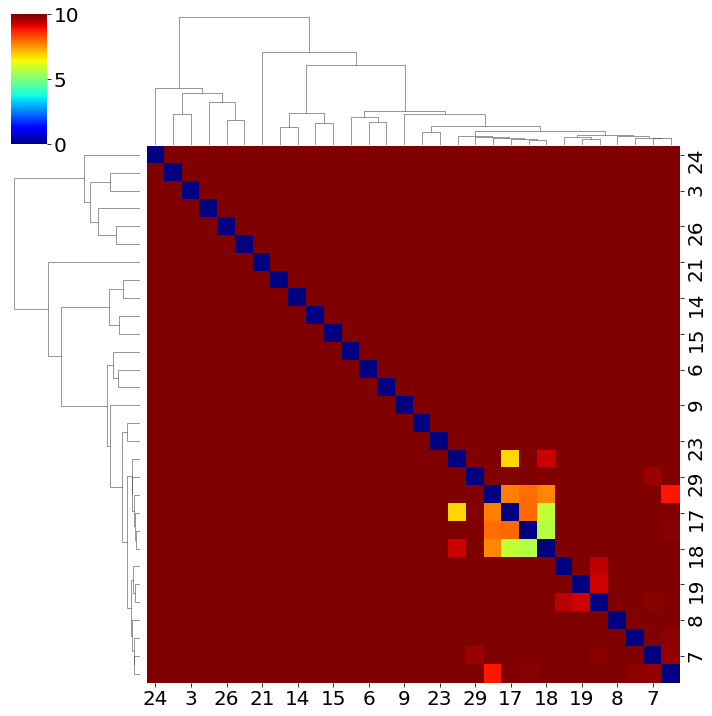

23


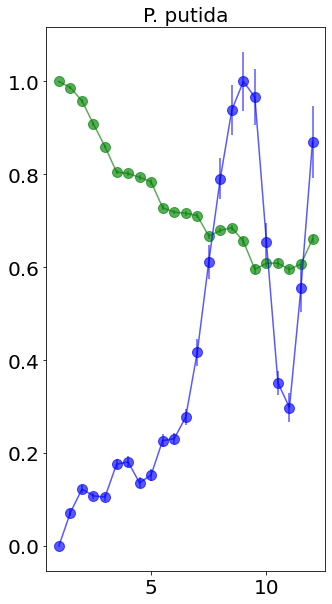

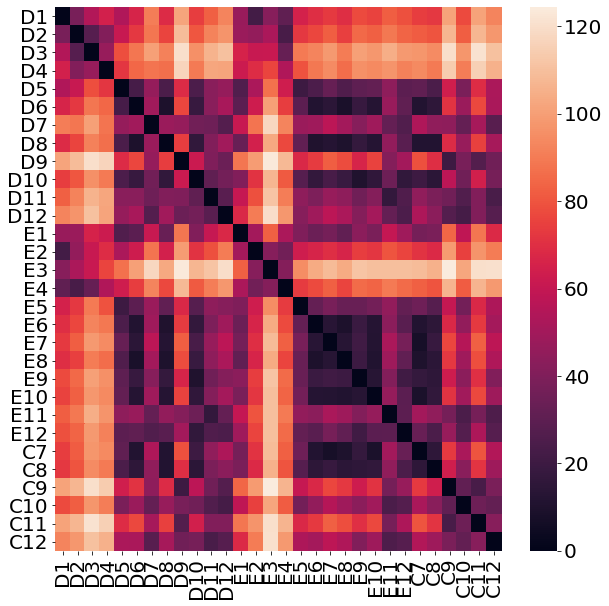

<Figure size 360x360 with 0 Axes>

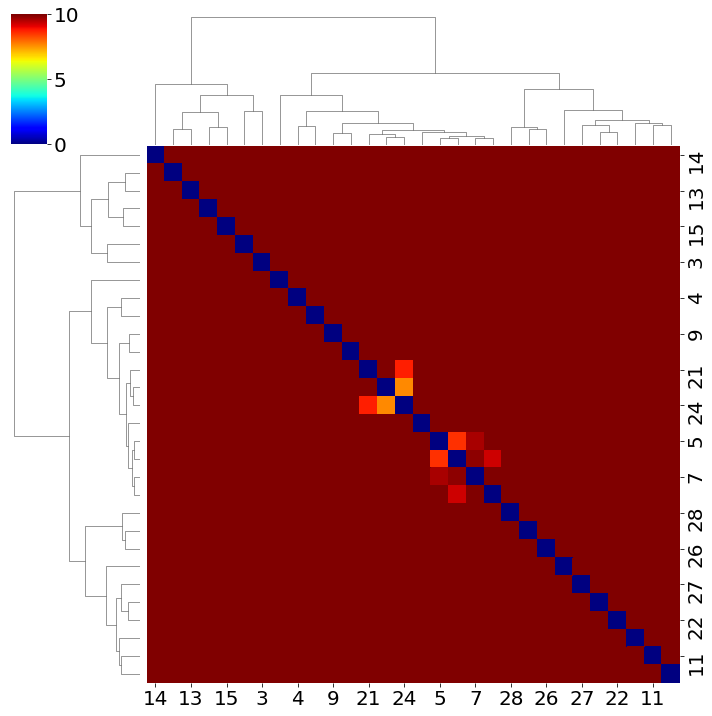

30


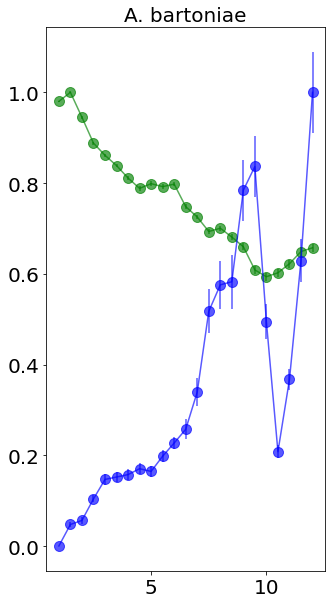

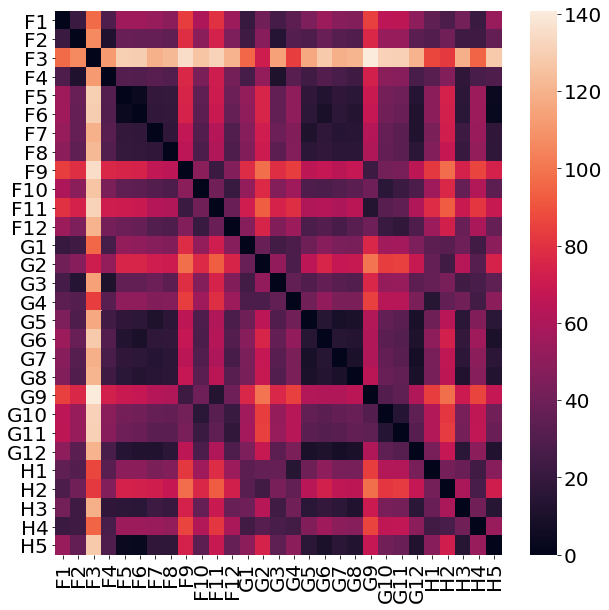

<Figure size 360x360 with 0 Axes>

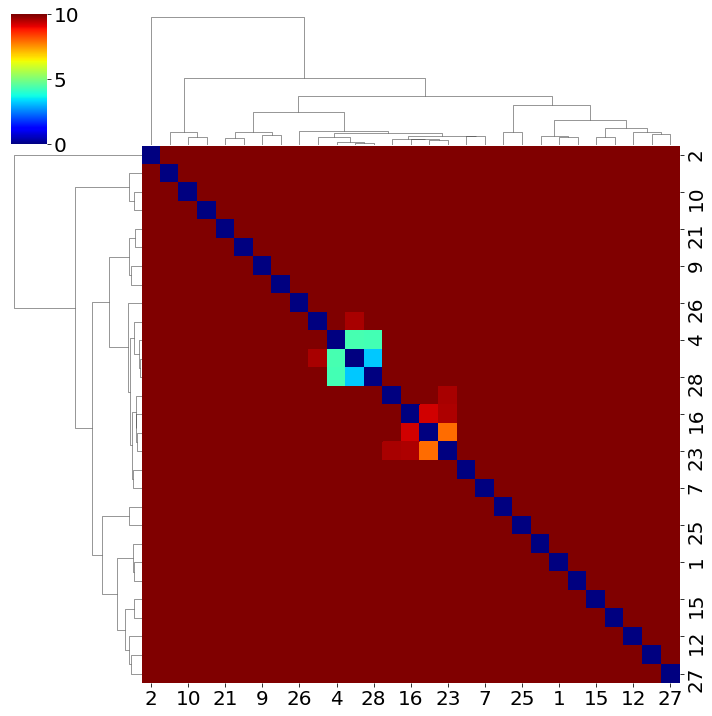

24


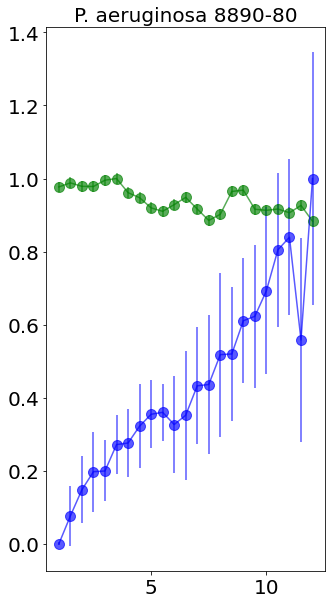

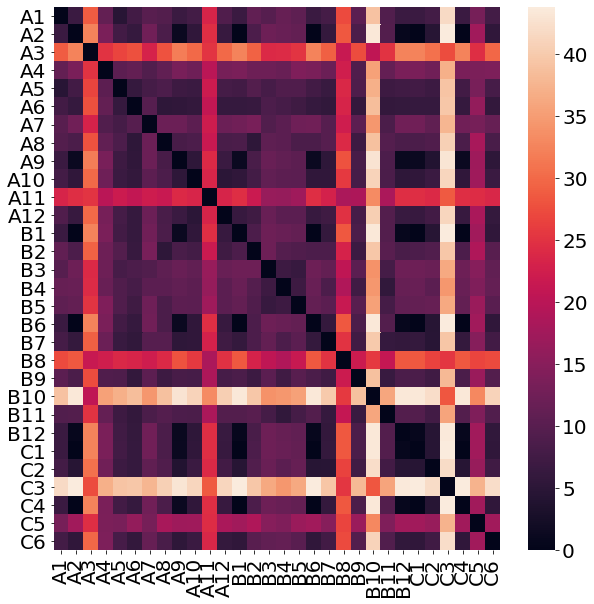

<Figure size 360x360 with 0 Axes>

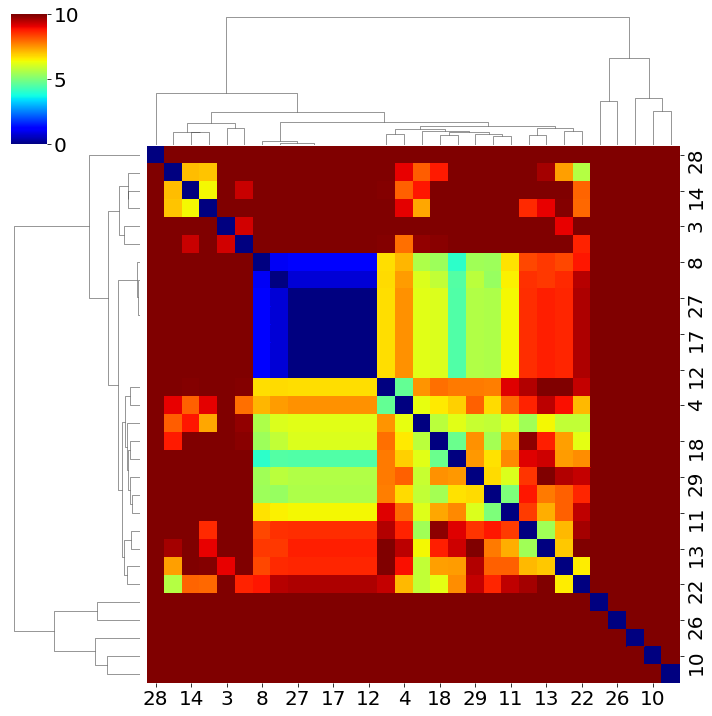

25


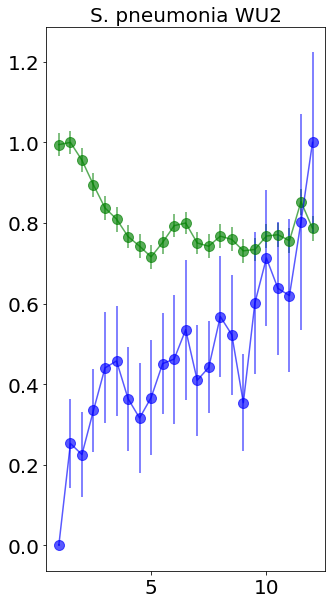

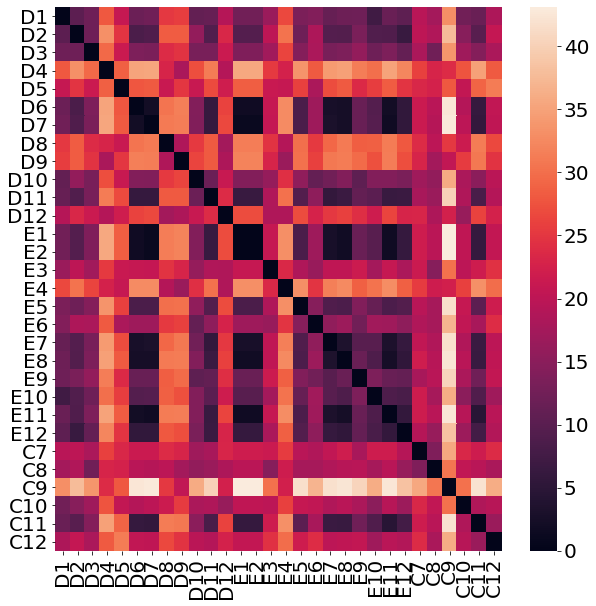

<Figure size 360x360 with 0 Axes>

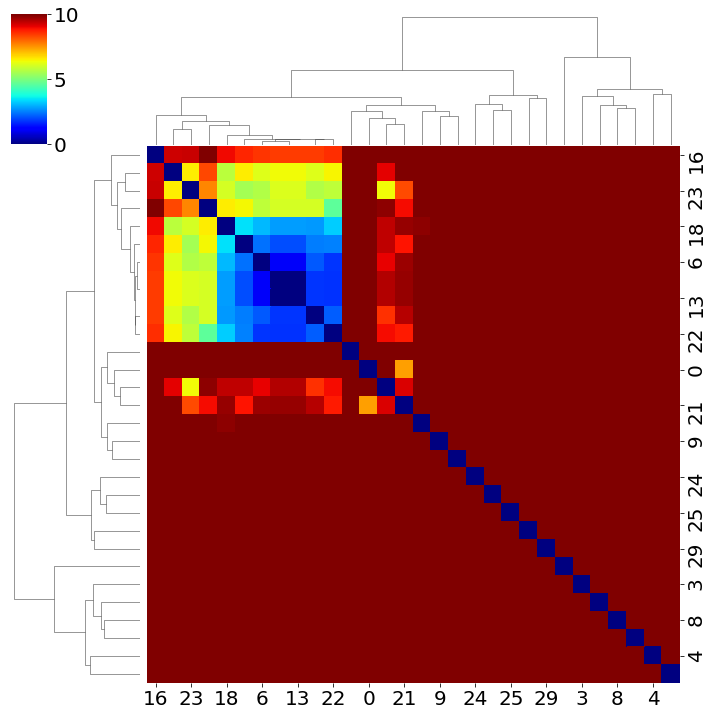

26


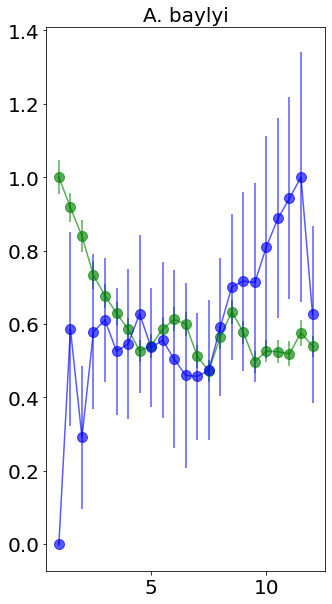

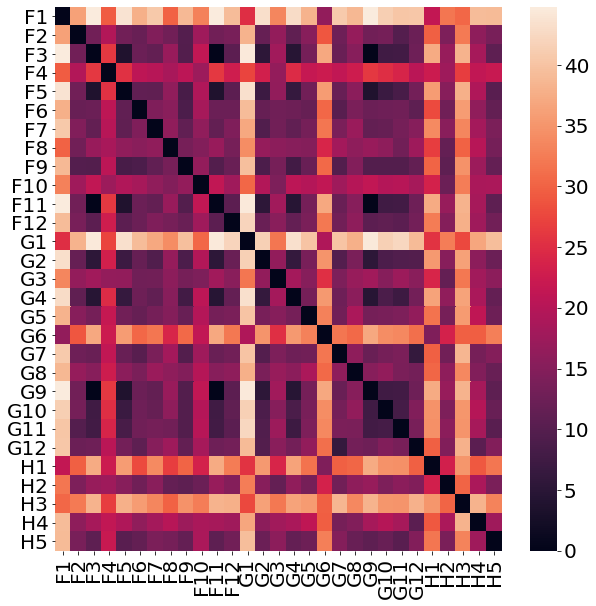

<Figure size 360x360 with 0 Axes>

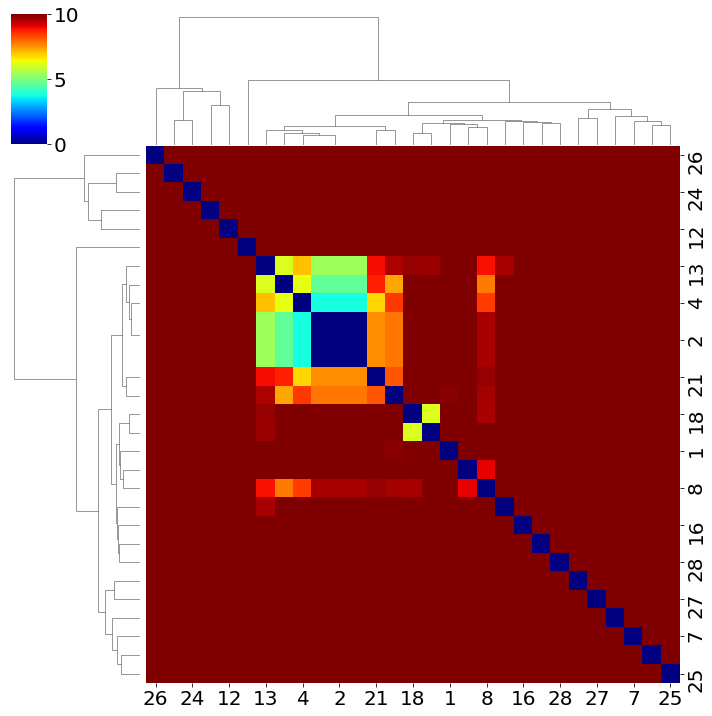

27


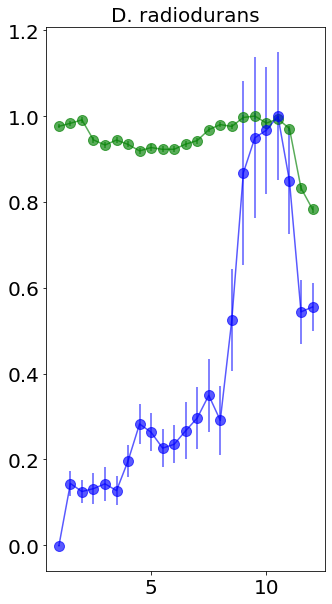

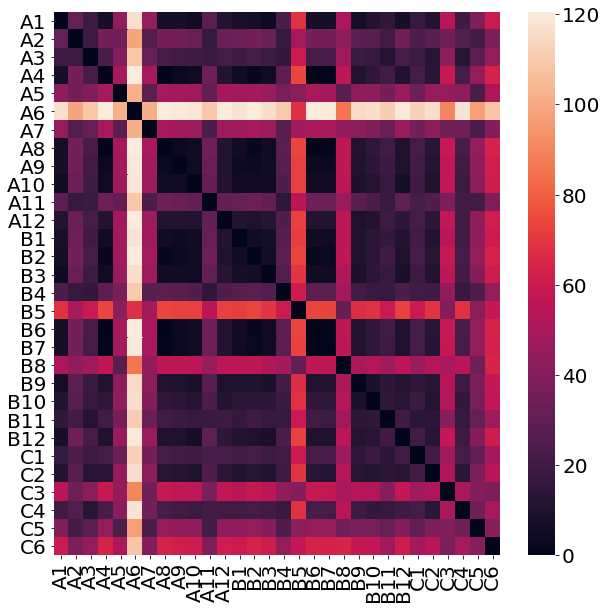

<Figure size 360x360 with 0 Axes>

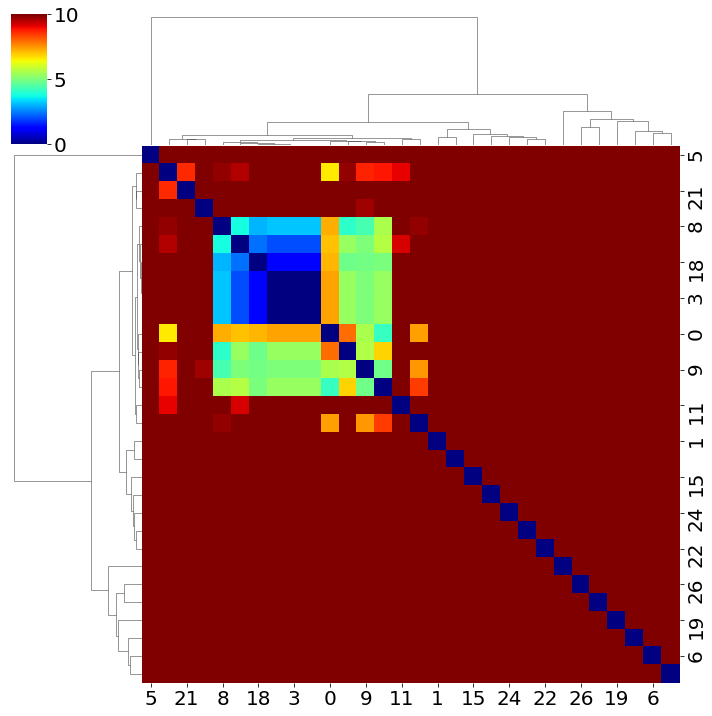

28


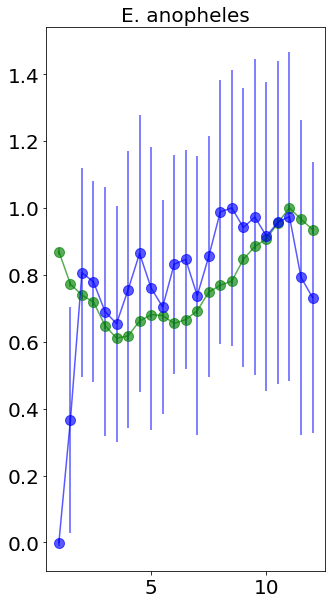

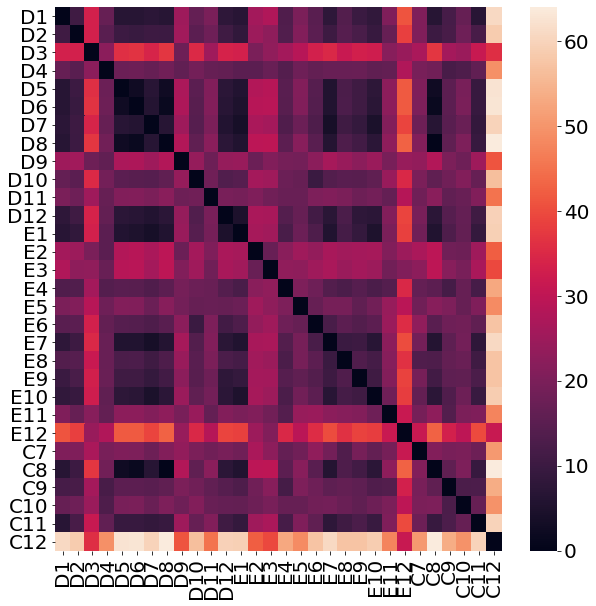

<Figure size 360x360 with 0 Axes>

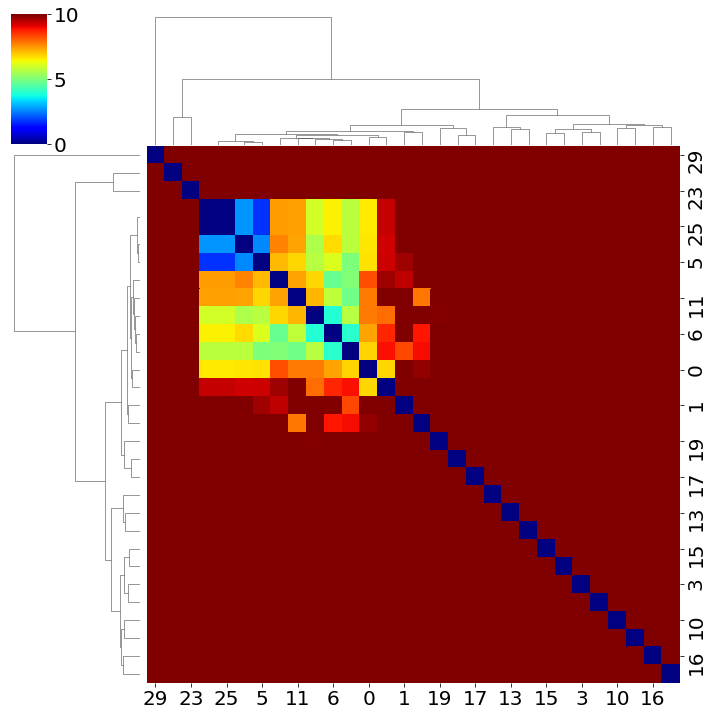

29


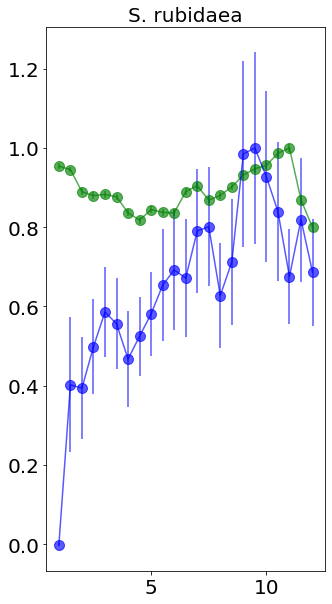

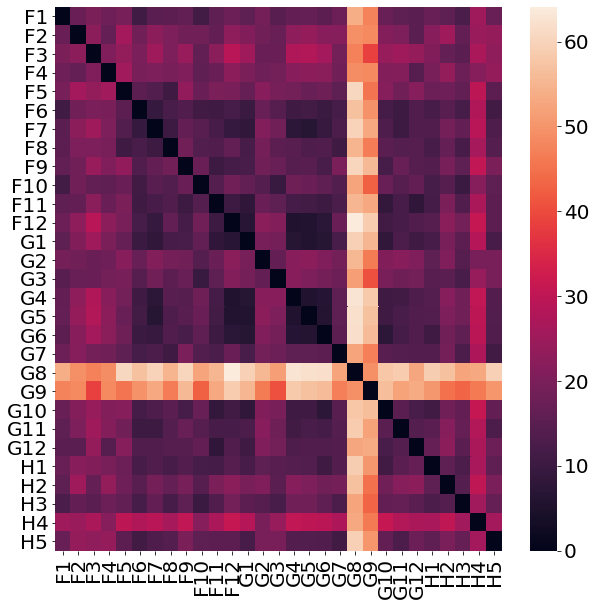

<Figure size 360x360 with 0 Axes>

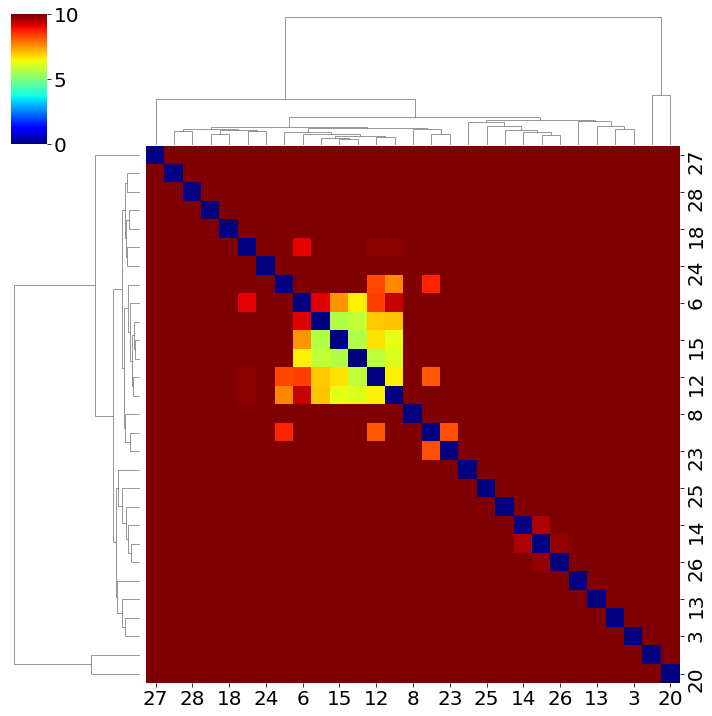

11


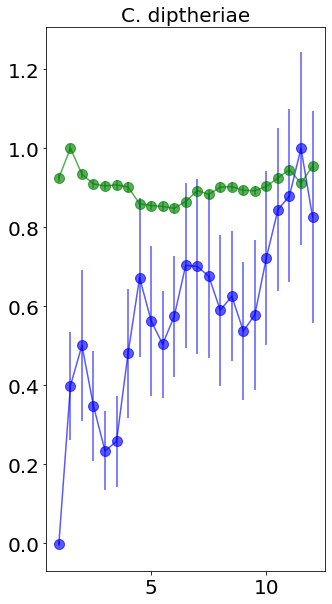

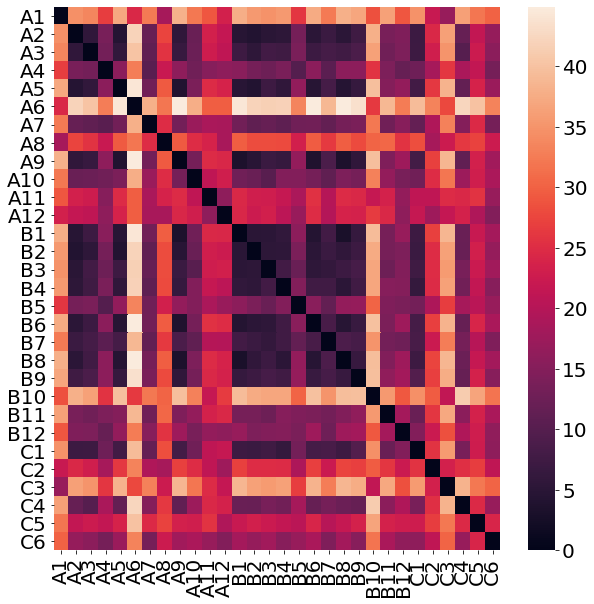

<Figure size 360x360 with 0 Axes>

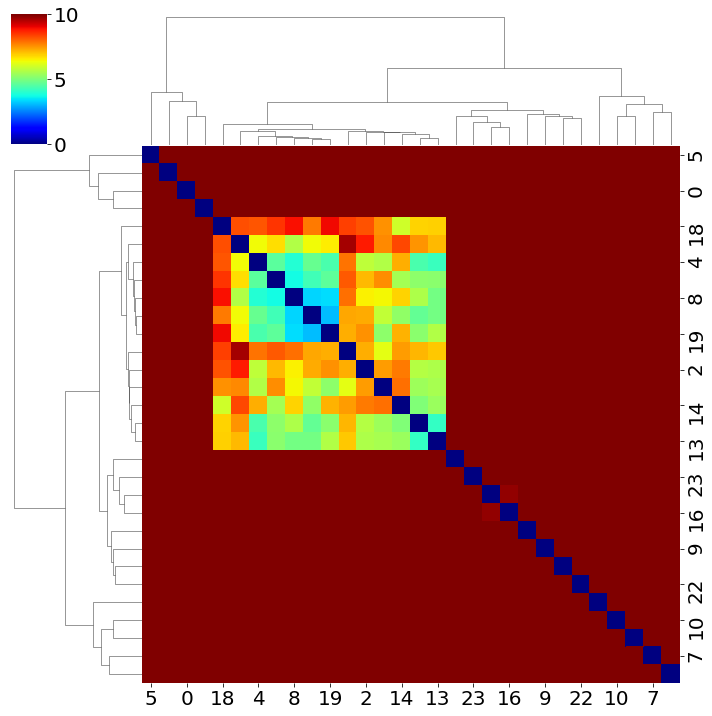

12


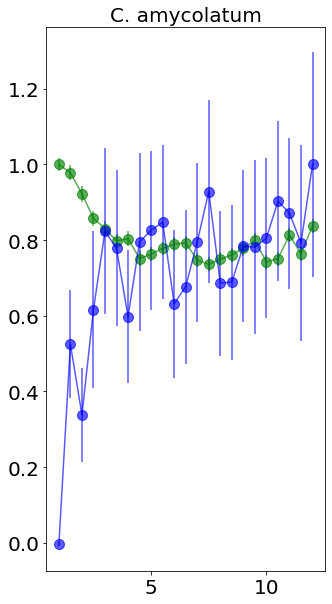

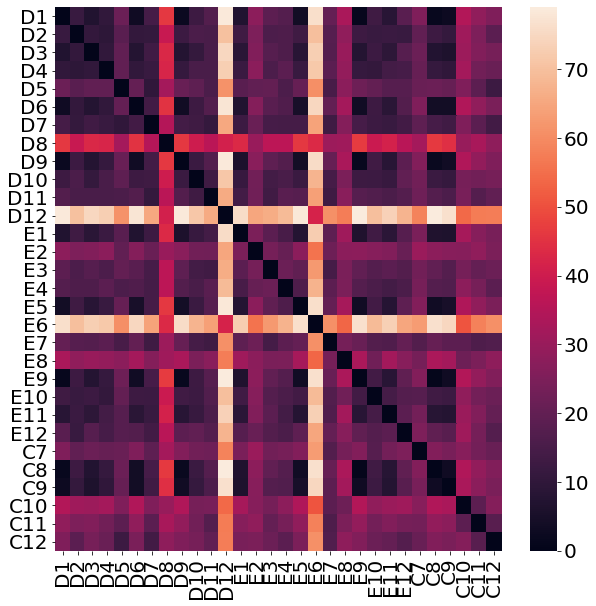

<Figure size 360x360 with 0 Axes>

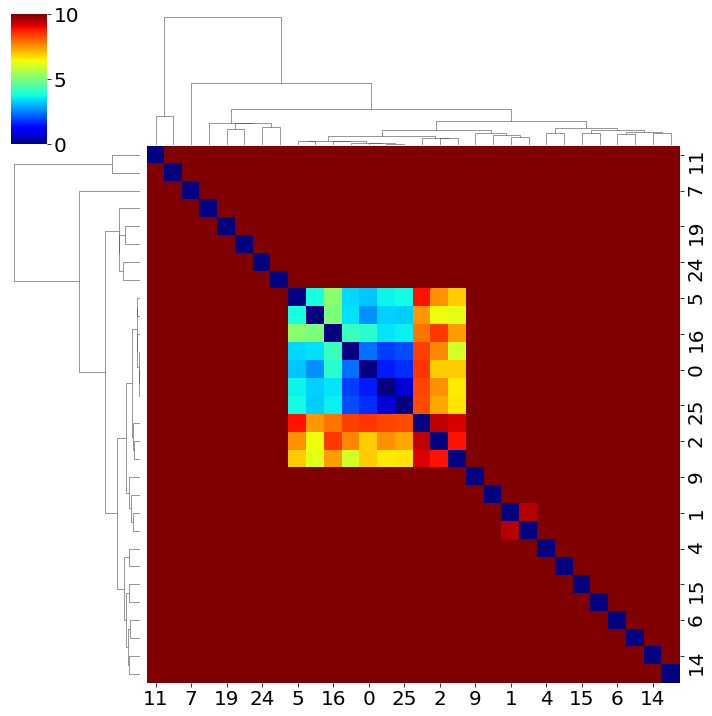

13


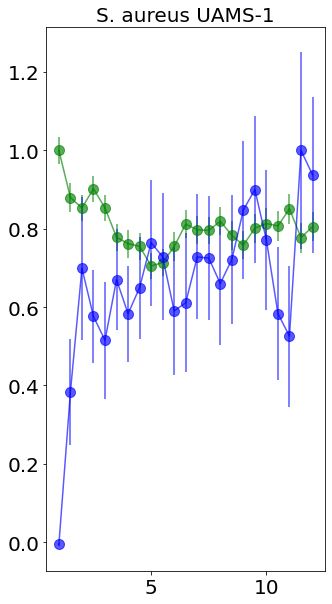

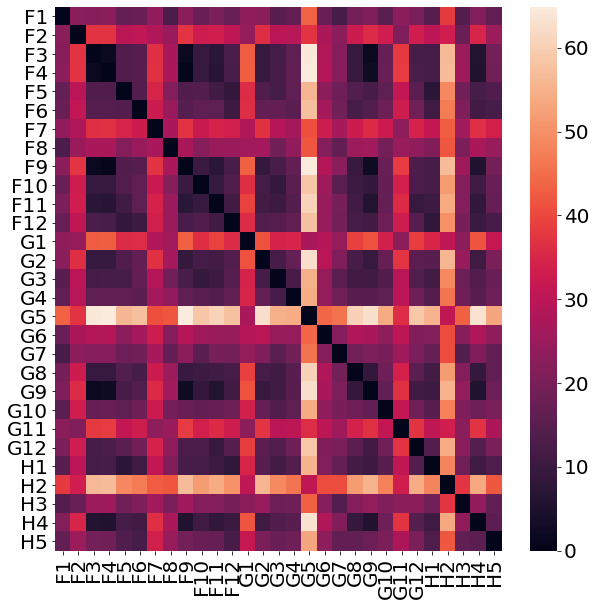

<Figure size 360x360 with 0 Axes>

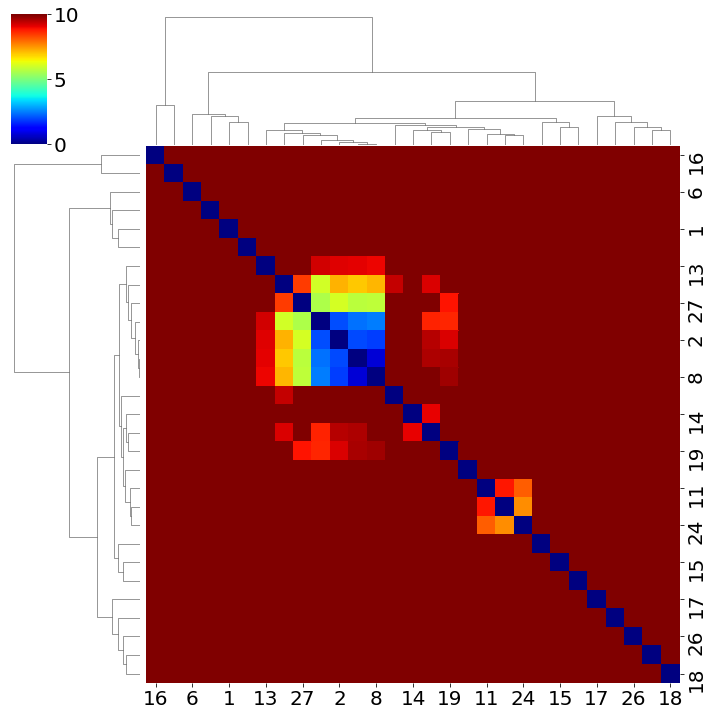

In [15]:
maxt = 23;
for filename in os.listdir(Pickle_Path):
    if '_HCT116.pickle' in filename and (not '210112' in filename): 
        output_file = open(Pickle_Path+'/'+filename,'rb'); 
        feature_dict = pickle.load(output_file);
        #print(feature_dict)

        StrainNumList = PSD['_'.join(filename.split('_')[0:2])]
        for StrainNumIndex in range(0,len(StrainNumList)):
            StrainNum = StrainNumList[StrainNumIndex];
            print(StrainNum)
            Num_to_Curve_Dict[StrainNum] = dict();
            
            if StrainNumIndex==0:
                all_row_ind = ['A','B']
                half_col_ind = ['1','2','3','4','5','6'];
                all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];
                all_indices = [];
                for full_index in ['A','B']:
                    for col_id in all_col_ind:
                        all_indices.append(full_index+col_id);
                for full_index in ['C']:
                    for col_id in half_col_ind:
                        all_indices.append(full_index+col_id);
            if StrainNumIndex==1: 
                all_row_ind = ['C','D','E']
                half_col_ind = ['7','8','9','10','11','12'];
                all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

                all_indices = [];
                for full_index in ['D','E']:
                    for col_id in all_col_ind:
                        all_indices.append(full_index+col_id);
                for full_index in ['C']:
                    for col_id in half_col_ind:
                        all_indices.append(full_index+col_id);
            if StrainNumIndex==2: 
                all_row_ind = ['F','G','H']
                half_col_ind = ['1','2','3','4','5',];
                all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

                all_indices = [];
                for full_index in ['F','G']:
                    for col_id in all_col_ind:
                        all_indices.append(full_index+col_id);
                for full_index in ['H']:
                    for col_id in half_col_ind:
                        all_indices.append(full_index+col_id);
                 

            all_traces = dict(); 
            for kernel_ind in [0,2]:
                all_traces[kernel_ind] = np.zeros( (len(all_indices),len(feature_dict['A1'].keys()) ))
                for well_id_index in range(0,len(all_indices)):
                    this_well = all_indices[well_id_index];
                    time_keys = list(feature_dict[this_well].keys());
                    time_keys.sort()
                    #print(time_keys)
                    kernel =  kernel_names[kernel_ind];
                    if kernel_ind==2:
                        
                        ys = [np.float(feature_dict[this_well][elem][kernel]) for elem in time_keys]
                        
                        ys = [np.max([elem - ys[0],0]) for elem in ys];


                    if kernel_ind==0:
                        ys = [np.float(feature_dict[this_well][elem][kernel]) for elem in time_keys]
                    if kernel_ind ==1:
                        ys = [np.float(feature_dict[this_well][elem][kernel]) for elem in time_keys]
                        ys = ys/np.max(ys);
                        ys = [np.max([elem-ys[0],0]) for elem in ys]
                    try:
                        all_traces[kernel_ind][well_id_index,:] =np.asarray(savgol_filter(ys,7,5),dtype=np.float);
                    except:
                        print(well_id_index)            
            
            for kernel_ind in [0,2]:
                Mean_Trace = np.mean(all_traces[kernel_ind][0:maxt],axis=0);
                Num_to_Curve_Dict[StrainNum][kernel_ind] = Mean_Trace/np.max(Mean_Trace); 
            Num_to_Name_Dict[StrainNum]=StrainNameList[StrainNum];
            times = [np.float(np.int(elem)*30.0/60.0) for elem in time_keys]
            
            Error_Matrix = np.zeros((len(all_indices),len(all_indices)));
            plt.figure(figsize=(5,10))
            for kernel_ind in [0,2]:
                Mean_Trace = np.mean(all_traces[kernel_ind][0:maxt],axis=0);
                ax = plt.errorbar(np.array(times[0:maxt]),Mean_Trace/np.max(Mean_Trace),np.std(all_traces[kernel_ind]/np.power(np.max(Mean_Trace),2),axis=0)[0:maxt],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)
                for row_ind in range(0,len(all_indices)):
                    for col_ind in range(0,len(all_indices)):
                        Error_Matrix[row_ind,col_ind] = np.linalg.norm(all_traces[kernel_ind][row_ind,:]-all_traces[kernel_ind][col_ind,:],ord=2);
            plt.title(StrainNameList[StrainNum],{'fontsize':20});
            Num_to_Name_Dict[StrainNum] = StrainNameList[StrainNum];
            
            #plt.plot(times[0:24],np.mean(all_traces[1],axis=0)[0:24],,markersize=20)
            #plt.plot(times[0:24],np.mean(all_traces[2],axis=0)[0:24],'b.',markersize=20)
            
            plt.figure(figsize=(10,10))
            sns.heatmap(Error_Matrix,xticklabels=all_indices,yticklabels=all_indices)
            plt.title(StrainNameList[StrainNum],{'fontsize':20});
            plt.figure(figsize=(5,5))
            
        
            sns.clustermap(Error_Matrix,cmap='jet',vmin=0.0,vmax=10.0) 
            plt.show()
        

In [ ]:
len(time_keys)

In [ ]:
StandardCurve_File = open('/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves_HCT116.pickle','wb');
All_Dicts = [Num_to_Curve_Dict,Num_to_Name_Dict]; 
pickle.dump(All_Dicts,StandardCurve_File);
StandardCurve_File.close(); 

In [ ]:
Num_to_Curve_Dict